<a href="https://colab.research.google.com/github/SaiSowmi-12/ADS1/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the Dataset
wbi = pd.read_csv('/content/World Bank dataset.csv')

In [ ]:
#Display the first 5 rows of the dataset
wbi.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,20130327,20284307,21378117,22733049,23560654,24404567,...,25909852,26482622,27466101,28284089,29347708,30560034,31622704,32792523,33831764,34700612
1,Afghanistan,AFG,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,47.71309974,47.56936236,47.49812858,47.49295618,47.55443859,47.68068411,...,48.13773155,48.4650217,48.82825103,49.22605514,49.63806203,50.05678331,50.48884498,50.93039807,51.38396791,51.84305395
2,Afghanistan,AFG,Population ages 65 and above (% of total popul...,SP.POP.65UP.TO.ZS,2.26197021,2.261948116,2.263973951,2.266752691,2.26864675,2.269749347,...,2.27621524,2.283569202,2.293543636,2.306614901,2.322140455,2.337911339,2.349769014,2.356535665,2.356695063,2.355497361
3,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,22.078,22.169,22.261,22.353,22.5,22.703,...,23.113,23.32,23.528,23.737,23.948,24.16,24.373,24.587,24.803,25.02
4,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.566,7.453,7.32,7.174,7.018,6.858,...,6.508,6.392,6.295,6.195,6.094,5.985,5.879,5.77,5.652,5.542


In [ ]:
#Display the last 5 rows of the dataset
wbi.tail()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 10/07/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Drop emty rows
wbi = wbi.dropna(subset=["Country Name","Series Code"], how="all")

#Also drop any rows that contain "World Development Indicators" or "Last Updated"
wbi = wbi[~wbi["Country Name"].astype(str).str.contains("World Development Indicators", na=False)]
wbi = wbi[~wbi["Country Name"].astype(str).str.contains("Last Updated", na=False)]

#Reset index
wbi = wbi.reset_index(drop=True)



In [ ]:
region_codes = [
    # Aggregates & group codes
    "WLD", "SST", "PRE", "INX", "LDC", "IBT", "IDA", "HPC", "FCS",
    # Income & lending groups
    "LTE", "LMC", "UMC", "LIC", "MIC", "HIC",
    # Regional aggregates
    "EAP", "EAS", "ECS", "LCN", "MEA", "NAC", "SSF", "OED", "EUU", "EMU"
]

wbi = wbi[~wbi["Country Code"].isin(region_codes)]

bad_name_keywords = [
        "World", "income", "states", "demographic dividend", "classification",
        "IDA", "IBRD", "HPC", "FCS", "area", "Europe", "Asia", "Africa", "America",
        "Caribbean", "OECD", "Arab", "Euro area", "total"
    ]
wbi = wbi[~wbi["Country Name"].astype(str)
              .str.contains("|".join(bad_name_keywords), case=False, na=False)]

wbi  = wbi.reset_index(drop=True)



In [ ]:
wbi.tail()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
5195,Zimbabwe,ZWE,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,685.421,711.492,682.77,688.402,670.594,655.537,...,616.663,597.916,575.365,534.002,509.089,476.153,448.129,422.627,410.176,400.331
5196,Zimbabwe,ZWE,Rule of Law: Estimate,RL.EST,-1.381908417,..,-1.596318245,-1.60702157,-1.688897371,-1.834908366,...,-1.808640599,-1.791505337,-1.870020509,-1.837631822,-1.793949366,-1.630184054,-1.587709188,-1.441851974,-1.339039564,-1.391646028
5197,Zimbabwe,ZWE,Government Effectiveness: Estimate,GE.EST,-0.757242501,..,-0.839923084,-0.935435832,-1.007125735,-1.35831821,...,-1.298620462,-1.546322942,-1.553164363,-1.53839469,-1.420855761,-1.373752475,-1.30847013,-1.281353831,-1.249573112,-1.258878112
5198,Zimbabwe,ZWE,Adequacy of social protection and labor progra...,per_allsp.adq_pop_tot,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5199,Zimbabwe,ZWE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,11.935,10.87,9.89,8.945,7.843,8.09,...,8.511,8.972,9.083,9.065,8.958,8.172,7.599,6.944,7.991,8.938


In [ ]:
#Load the Dataset
ws = pd.read_csv('/content/Suicide dataset.csv')

In [ ]:
#Display the first 5 rows of the dataset
ws.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#Display the last 5 rows of the dataset
ws.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [ ]:
#1. LOAD & CLEAN SUICIDE DATA
ws = pd.read_csv("/content/Suicide dataset.csv")

# --- Standardize column names from suicide dataset ---
ws.rename(columns={
    'suicides/100k pop': 'suicide_rate_per_100k',
    'HDI for year': 'hdi',
    'gdp_for_year ($)': 'gdp_total_usd',
    'gdp_per_capita ($)':'gdp_per_capita_usd'
}, inplace=True)

# --- Keep only columns we actually need ---
keep_cols = ['country', 'year', 'sex', 'age',
             'suicides_no', 'population', 'suicide_rate_per_100k']
keep_cols = [c for c in keep_cols if c in ws.columns] # Filter to only existing columns
ws = ws[keep_cols].copy()

# --- Filter years 2000–2016 ---
ws = ws[(ws['year'] >= 2000) & (ws['year'] <= 2016)]

# --- Basic cleaning ---
ws.dropna(subset=['country', 'year', 'suicides_no', 'population'], inplace=True)
ws = ws[ws['population'] > 0]

# Ensure numeric
for col in ['year', 'suicides_no', 'population', 'suicide_rate_per_100k']:
    if col in ws.columns:
        ws[col] = pd.to_numeric(ws[col], errors='coerce')

print("Suicide data cleaned (row level for EDA):", ws.shape)

# --- Ensure suicide_rate_per_100k is consistent ---
ws['suicide_rate_per_100k'] = (
    ws['suicides_no'] / ws['population'] * 100000
)

# Make a copy for EDA (keeps sex + age)
ws_eda = ws.copy()

# --- Aggregate for modeling (country–year level) ---
ws_model = ws.groupby(['country', 'year'], as_index=False).agg({
    'suicides_no': 'sum',
    'population': 'sum'
})
ws_model['suicide_rate_per_100k'] = (
    ws_model['suicides_no'] / ws_model['population'] * 100000
)

print("Suicide data aggregated for modeling (country-year):", ws_model.shape)


Suicide data cleaned (row level for EDA): (16168, 7)
Suicide data aggregated for modeling (country-year): (1350, 5)


In [ ]:
# 2. LOAD & CLEAN WORLD BANK (WDI) DATA
wbi = pd.read_csv("/content/World Bank dataset.csv")

# Drop footer / empty metadata rows
wbi = wbi.dropna(subset=["Country Name", "Series Code"], how="all")

#Remove aggregates / regions / income groups by Country Code
region_codes = [
    #global/aggregate/group codes
    "WLD","SST","PRE","INX","LDC","IBT","IDA","HPC","FCS",
    #income / lending gropups
    "LTE","LMC","UMC","LIC","MIC","HIC",
    #regional codes
    "EAP","EAS","ECS","LCN","MEA","NAC","SSF","OED","EUU","EMU"

]
if "Country Code" in wbi.columns:
  wbi = wbi[~wbi["Country Code"].isin(region_codes)]

#Extra safety: remove region-like names
bad_name_keywords = [
    "World","income","states","demographic dividend","classification",
    "IDA","IBRD","HPC","FCS","area","Europe","Asia","Africa","America",
    "Caribbean","OECD","Arab","Euro area","total"
]
wbi = wbi[~wbi["Country Name"].astype(str)
          .str.contains("|".join(bad_name_keywords), case=False, na=False)]

wbi.reset_index(drop=True, inplace=True)

print("WBI after removing aggregates:", wbi.shape)

#Replace '..' with Nan and convert year columns to numeric
wbi.replace('..', np.nan, inplace=True)
for col in wbi.columns[4:]:
    wbi[col] = pd.to_numeric(wbi[col],  errors='coerce')

WBI after removing aggregates: (5201, 21)


In [ ]:
#3. RESHAPE WBI (years as cols) -LONG-WIDE (features as cols)
#Melt to long
wbi_long = wbi.melt(
    id_vars=['Country Name','Country Code','Series Name','Series Code'],
    var_name='year', value_name='value'
)

#Extract year from "2000[YR2000]"etc.
wbi_long['year']=wbi_long['year'].astype(str).str.extract(r'(\d{4})')
wbi_long.dropna(subset=['year'], inplace=True)
wbi_long['year'] = wbi_long['year'].astype(int)

#Pivot so each Series Code becomes a feature column
wbi_pivot = wbi_long.pivot_table(
    index=['Country Name','Country Code','year'],
    columns='Series Code',
    values='value'
).reset_index()

#Filter years 2000-2016
wbi_pivot = wbi_pivot[(wbi_pivot['year'] >= 2000) & (wbi_pivot['year'] <= 2016)]

In [ ]:
#4. RENAME SELECTED INDICATOR COLUMNS

rename_dict = {
    #Demographics
    'SP.POP.TOTL': 'population_total',
    'SP.URB.TOTL.IN.ZS': 'urban_population_pct',
    'SP.POP.1564.TO.ZS': 'working_age_population_pct',
    'SP.POP.65UP.TO.ZS': 'elderly_population_pct',
    'SP.DYN.TFRT.IN': 'total_fertility_rate',

    #Economic
    'NY.GDP.PCAP.CD' : 'gdp_per_capita_usd',
    'NY.GDP.MKTP.KD.ZG': 'gdp_growth_pct',
    'SL.UEM.TOTL.ZS': 'unemployment_rate_pct',
    'SL.UEM.1524.ZS': 'youth_unemployment_rate_pct',
    'SL.TLF.CACT.ZS': 'labor_participation_rate_pct',
    'FP.CPI.TOTL.ZG': 'inflation_cpi_pct',
    'SI.POV.GINI': 'gini_index',
    'SI.POV.DDAY': 'Poverty_rate_pct',

    #Health
    'SH.XPD.CHEX.GD.ZS': 'health_expenditure_pct_gdp',
    'SP.DYN.LE00.IN': 'life_expectancy_years',
    'SP.DYN.AMRT.MA': 'adult_male_mortality_per_1k',
    'SP.DYN.AMRT.FE': 'adult_female_mortality_per_1k',
    'SH.MED.PHYS.ZS': 'physicians_per_1k',
    'SH.MED.BEDS.ZS': 'hospital_beds_per_1k',

    #Education
    'SE.XPD.TOTL.GD.ZS': 'education_expenditure_pct_gdp',
    'SE.ADT.LITR.ZS': 'adult_literacy_rate_pct',
    'SE.SEC.ENRR': 'secondary_school_enrollment_pct',

    #Governance
    'GE.EST': 'government_effectiveness',
    'RL.EST': 'rule_of_law_estimate',

    #Social protection
    'per_allsp.adq_pop_tot': 'social_protection_adequacy_pct'
}

wbi_pivot.rename(columns=rename_dict, inplace=True)

print("WBI pivotes and renamed:", wbi_pivot.shape)


WBI pivotes and renamed: (3536, 28)


In [ ]:
#5.SIMPLE IMPUTATION (fill small gaps)

feature_cols = [c for c in wbi_pivot.columns
                if c not in ['Country Name', 'Country Code', 'year']]

#interpolate within each country over time
wbi_pivot[feature_cols] = (
    wbi_pivot.groupby('Country Name')[feature_cols]
    .apply(lambda g:g.interpolate(limit_direction='both'))
    .reset_index(level=0, drop=True)
)

#final fallback:fill any remaining NaNa with column means
for col in feature_cols:
    wbi_pivot[col] = wbi_pivot[col].fillna(wbi_pivot[col].mean())

print("WBI missing values handled")

WBI missing values handled


In [ ]:
#6. MERGE; EDA VERSION (keep sex & age)

merged_eda = pd.merge(
    ws_eda,
    wbi_pivot,
    left_on=['country','year'],
    right_on=['Country Name','year'],
    how='inner'
)

#Drop duplicate name/code columns if you like
merged_eda.drop(columns=['Country Name','Country Code'], inplace=True)

print("Merged EDA dataset (keep sex & age):", merged_eda.shape)


Merged EDA dataset (keep sex & age): (14010, 32)


In [ ]:
#7. MERGE; MODELING VERSION (country-year level)

merged_model =  pd.merge(
    ws_model,
    wbi_pivot,
    left_on=['country','year'],
      right_on=['Country Name','year'],
    how='inner'
)

merged_model.drop(columns=['Country Name','Country Code'], inplace=True)

print("Merged MODEL dataset (country-year):", merged_model.shape)


Merged MODEL dataset (country-year): (1170, 30)


In [ ]:
#8.SAVE FINAL DATASETS
merged_eda.to_csv("merged_eda_suicide_wbi_2000_2016.csv", index=False)
merged_model.to_csv("merged_model_suicide_wbi_2000_2016.csv", index=False)

print("\n Saved:")
print(" -merged__eda_suicide_wbi_2000_2016.csv")
print(" -merged__model_suicide_wbi_2000_2016.csv")



 Saved:
 -merged__eda_suicide_wbi_2000_2016.csv
 -merged__model_suicide_wbi_2000_2016.csv


EDA - Exploratory data Analysis

In [ ]:
eda = pd.read_csv('/content/merged_eda_suicide_wbi_2000_2016.csv')

In [ ]:
eda.head()

,country,year,sex,age,suicides_no,population,suicide_rate_per_100k,inflation_cpi_pct,government_effectiveness,gdp_growth_pct,...,unemployment_rate_pct,adult_female_mortality_per_1k,adult_male_mortality_per_1k,life_expectancy_years,total_fertility_rate,working_age_population_pct,elderly_population_pct,population_total,urban_population_pct,social_protection_adequacy_pct
0,Albania,2000,male,25-34 years,17,232000,7.327586,3.320871,-0.91778,7.462859,...,19.023,63.313,130.704,74.826,2.217,63.052606,7.330691,3089027.0,41.741,23.890741
1,Albania,2000,male,55-74 years,10,177400,5.636979,3.320871,-0.91778,7.462859,...,19.023,63.313,130.704,74.826,2.217,63.052606,7.330691,3089027.0,41.741,23.890741
2,Albania,2000,female,75+ years,2,37800,5.291005,3.320871,-0.91778,7.462859,...,19.023,63.313,130.704,74.826,2.217,63.052606,7.330691,3089027.0,41.741,23.890741
3,Albania,2000,male,75+ years,1,24900,4.016064,3.320871,-0.91778,7.462859,...,19.023,63.313,130.704,74.826,2.217,63.052606,7.330691,3089027.0,41.741,23.890741
4,Albania,2000,female,15-24 years,6,263900,2.273588,3.320871,-0.91778,7.462859,...,19.023,63.313,130.704,74.826,2.217,63.052606,7.330691,3089027.0,41.741,23.890741


In [ ]:
eda.tail()

,country,year,sex,age,suicides_no,population,suicide_rate_per_100k,inflation_cpi_pct,government_effectiveness,gdp_growth_pct,...,unemployment_rate_pct,adult_female_mortality_per_1k,adult_male_mortality_per_1k,life_expectancy_years,total_fertility_rate,working_age_population_pct,elderly_population_pct,population_total,urban_population_pct,social_protection_adequacy_pct
14005,Uzbekistan,2014,female,35-54 years,107,3620833,2.955121,9.283094,-0.63756,6.873838,...,5.09,127.087,212.425,70.973,2.546,67.190508,4.671729,30222994.0,50.85,23.21468
14006,Uzbekistan,2014,female,75+ years,9,348465,2.582756,9.283094,-0.63756,6.873838,...,5.09,127.087,212.425,70.973,2.546,67.190508,4.671729,30222994.0,50.85,23.21468
14007,Uzbekistan,2014,male,5-14 years,60,2762158,2.172215,9.283094,-0.63756,6.873838,...,5.09,127.087,212.425,70.973,2.546,67.190508,4.671729,30222994.0,50.85,23.21468
14008,Uzbekistan,2014,female,5-14 years,44,2631600,1.671987,9.283094,-0.63756,6.873838,...,5.09,127.087,212.425,70.973,2.546,67.190508,4.671729,30222994.0,50.85,23.21468
14009,Uzbekistan,2014,female,55-74 years,21,1438935,1.459413,9.283094,-0.63756,6.873838,...,5.09,127.087,212.425,70.973,2.546,67.190508,4.671729,30222994.0,50.85,23.21468


In [ ]:
#print the shape of the dataset as (rows, columns)
print(eda.shape)

(14010, 32)


In [ ]:
#Data types of each column to understand which are numerical/categorical
print(eda.dtypes)

country                             object
year                                 int64
sex                                 object
age                                 object
suicides_no                          int64
population                           int64
suicide_rate_per_100k              float64
inflation_cpi_pct                  float64
government_effectiveness           float64
gdp_growth_pct                     float64
gdp_per_capita_usd                 float64
rule_of_law_estimate               float64
adult_literacy_rate_pct            float64
secondary_school_enrollment_pct    float64
education_expenditure_pct_gdp      float64
hospital_beds_per_1k               float64
physicians_per_1k                  float64
health_expenditure_pct_gdp         float64
Poverty_rate_pct                   float64
gini_index                         float64
labor_participation_rate_pct       float64
youth_unemployment_rate_pct        float64
unemployment_rate_pct              float64
adult_femal

In [ ]:
#Generate descriptive statistics(mean,std,min,etc) for each numerical features
print(eda.describe())

               year   suicides_no    population  suicide_rate_per_100k  \
count  14010.000000  14010.000000  1.401000e+04           14010.000000   
mean    2007.373876    212.339329  1.638779e+06              12.327960   
std        4.596346    794.161132  3.186678e+06              17.877068   
min     2000.000000      0.000000  2.780000e+02               0.000000   
25%     2003.000000      3.000000  9.912825e+04               1.007233   
50%     2007.000000     25.000000  4.336255e+05               5.859046   
75%     2011.000000    123.000000  1.438176e+06              15.612636   
max     2016.000000  21262.000000  2.846186e+07             204.918033   

       inflation_cpi_pct  government_effectiveness  gdp_growth_pct  \
count       14010.000000              14010.000000    14010.000000   
mean            4.606398                  0.589471        3.341619   
std             5.883104                  0.921694        4.134340   
min            -4.447547                 -1.566920   

In [ ]:
#Display a concise summary of the DataFrame, including data types and non-null counts
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14010 entries, 0 to 14009
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          14010 non-null  object 
 1   year                             14010 non-null  int64  
 2   sex                              14010 non-null  object 
 3   age                              14010 non-null  object 
 4   suicides_no                      14010 non-null  int64  
 5   population                       14010 non-null  int64  
 6   suicide_rate_per_100k            14010 non-null  float64
 7   inflation_cpi_pct                14010 non-null  float64
 8   government_effectiveness         14010 non-null  float64
 9   gdp_growth_pct                   14010 non-null  float64
 10  gdp_per_capita_usd               14010 non-null  float64
 11  rule_of_law_estimate             14010 non-null  float64
 12  adult_literacy_rat

In [ ]:
#check for missing values in each column of the dataset
print(eda.isnull().sum())

country                            0
year                               0
sex                                0
age                                0
suicides_no                        0
population                         0
suicide_rate_per_100k              0
inflation_cpi_pct                  0
government_effectiveness           0
gdp_growth_pct                     0
gdp_per_capita_usd                 0
rule_of_law_estimate               0
adult_literacy_rate_pct            0
secondary_school_enrollment_pct    0
education_expenditure_pct_gdp      0
hospital_beds_per_1k               0
physicians_per_1k                  0
health_expenditure_pct_gdp         0
Poverty_rate_pct                   0
gini_index                         0
labor_participation_rate_pct       0
youth_unemployment_rate_pct        0
unemployment_rate_pct              0
adult_female_mortality_per_1k      0
adult_male_mortality_per_1k        0
life_expectancy_years              0
total_fertility_rate               0
w

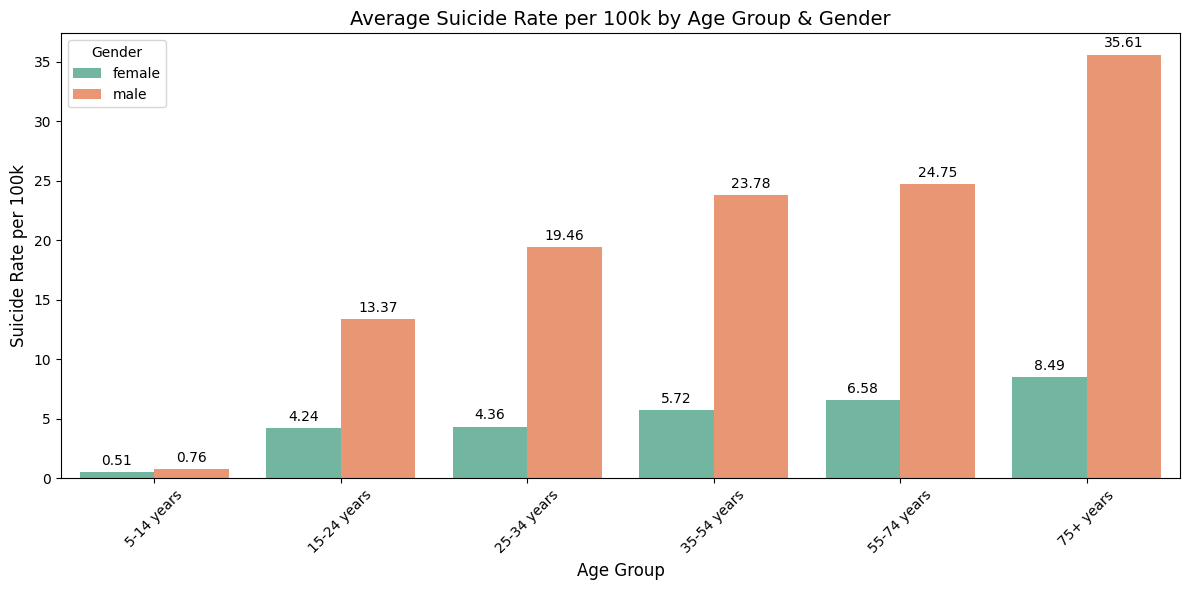

In [ ]:
#Average Suicide Rate per 100k by Age Group & Gender

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Group BY age + sex
age_gender_group = (
    eda.groupby(['age', 'sex'])['suicide_rate_per_100k']
    .mean()
    .reset_index()
)

#ascending by suicide rate
age_gender_group = age_gender_group.sort_values(
    by='suicide_rate_per_100k', ascending=True
)

#Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=age_gender_group,
    x='age',
    y='suicide_rate_per_100k',
    hue='sex',
    palette='Set2'
)

plt.title('Average Suicide Rate per 100k by Age Group & Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Suicide Rate per 100k', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')

#add values labels on each bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        padding=3
    )

plt.tight_layout()
plt.show()

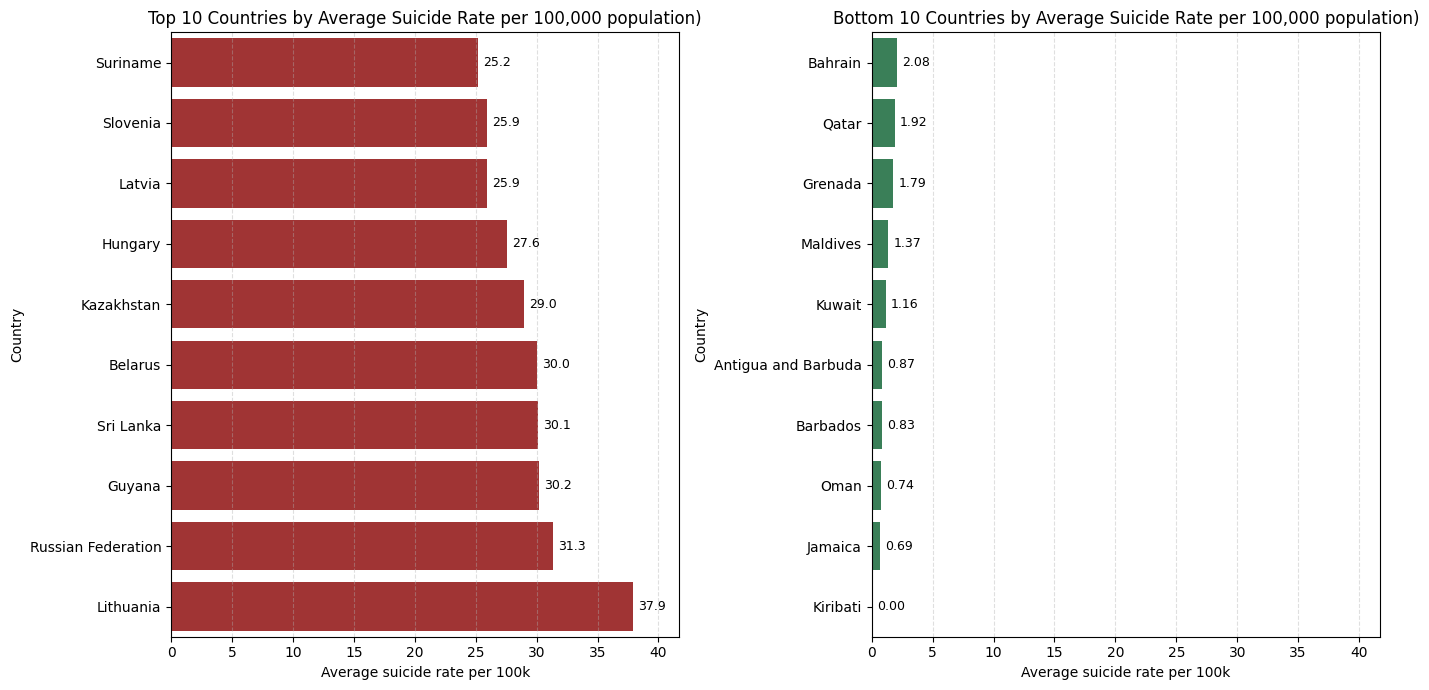

In [ ]:
#Bottom 10 Countries by Average Suicide Rate per 100,000 population

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Compute country averages
country_avg = (
    eda.groupby("country")["suicide_rate_per_100k"]
       .mean()
       .sort_values(ascending=False)
)

top10 = country_avg.head(10)[::-1]
bottom10 = country_avg.tail(10)

#Set shared x-axis limits for fair comparison
xmax = max(top10.max(), bottom10.max()) * 1.10  # add 10% padding

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Top 10
sns.barplot(
    x=top10.values,
    y=top10.index,
    ax=axes[0],
    color="firebrick"
)
axes[0].set_title("Top 10 Countries by Average Suicide Rate per 100,000 population)")
axes[0].set_xlabel("Average suicide rate per 100k")
axes[0].set_ylabel("Country")
axes[0].grid(axis="x", linestyle="--", alpha=0.4)

#annotate values
for i, v in enumerate(top10.values):
    axes[0].text(v + xmax*0.01, i, f"{v:.1f}", va="center", fontsize=9)

#Bottom 10
sns.barplot(
    x=bottom10.values,
    y=bottom10.index,
    ax=axes[1],
    color="seagreen"
)
axes[1].set_title("Bottom 10 Countries by Average Suicide Rate per 100,000 population)")
axes[1].set_xlabel("Average suicide rate per 100k")
axes[1].set_ylabel("Country")
axes[1].grid(axis="x", linestyle="--", alpha=0.4)

for i, v in enumerate(bottom10.values):
    axes[1].text(v + xmax*0.01, i, f"{v:.2f}", va="center", fontsize=9)

# Apply common x-axis limit
for ax in axes:
    ax.set_xlim(0, xmax)

plt.tight_layout()
plt.show()

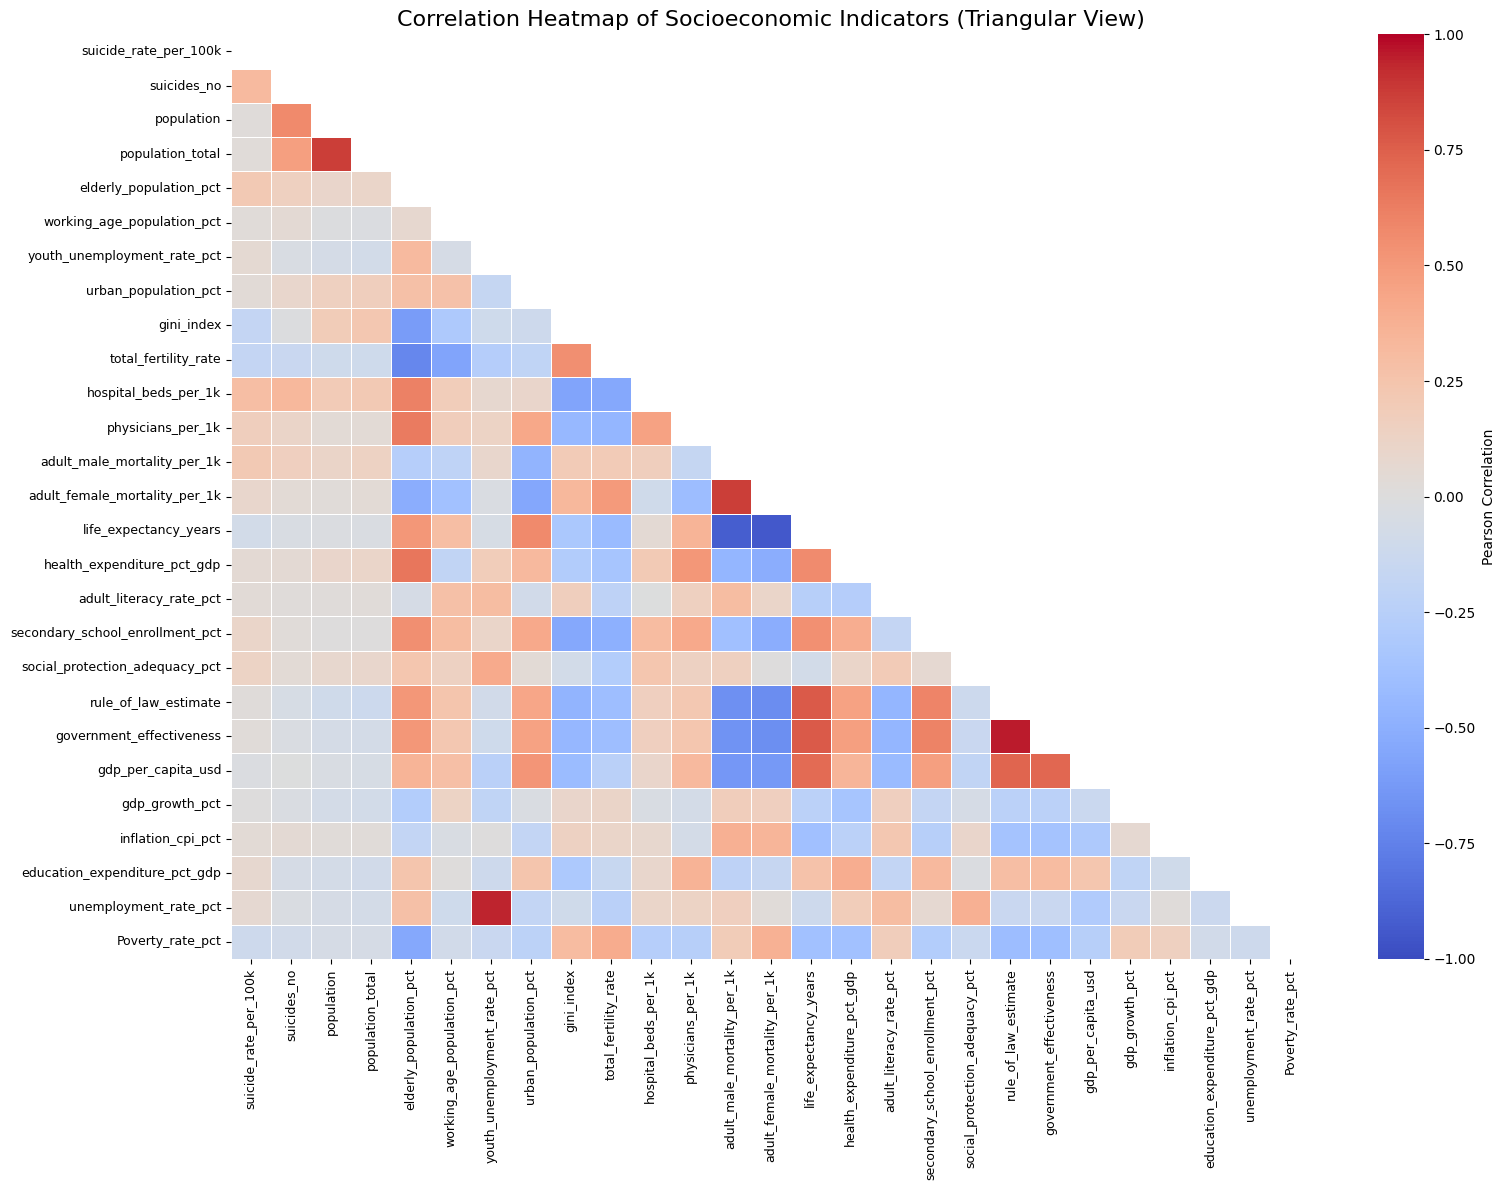

In [ ]:
#Correlation Heatmap of Socioecomic Indicators

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Compute correlation
corr = eda.corr(numeric_only=True)

#Sort Variables by category
ordered_cols = [
    'suicide_rate_per_100k','suicides_no','population','population_total',

    #Demographic
    'elderly_population_pct','working_age_population_pct','youth_unemployment_rate_pct',
    'urban_population_pct','gini_index','total_fertility_rate',

    #Health
    'hospital_beds_per_1k','physicians_per_1k','adult_male_mortality_per_1k',
    'adult_female_mortality_per_1k','life_expectancy_years',
    'health_expenditure_pct_gdp',

    #Education / Social
    'adult_literacy_rate_pct','secondary_school_enrollment_pct',
    'social_protection_adequacy_pct','rule_of_law_estimate','government_effectiveness',

    #Economy
    'gdp_per_capita_usd','gdp_growth_pct','inflation_cpi_pct',
    'education_expenditure_pct_gdp','unemployment_rate_pct','Poverty_rate_pct'
]

#Keep only columns that exist
ordered_cols = [c for c in ordered_cols if c in corr.columns]
corr = corr.loc[ordered_cols, ordered_cols]

#Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Plot triangular heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=False,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
)

plt.title("Correlation Heatmap of Socioeconomic Indicators (Triangular View)", fontsize=16)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()



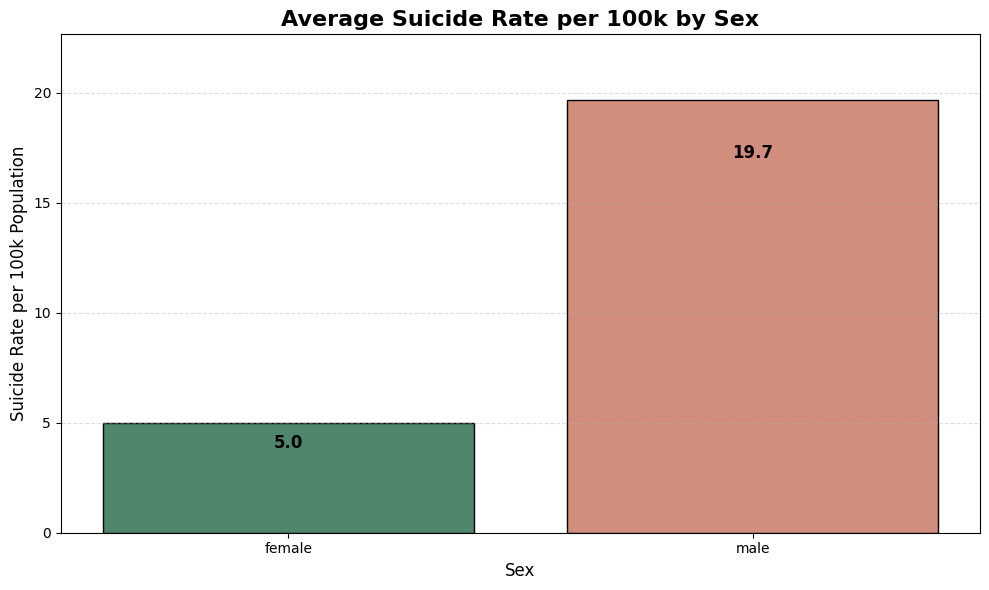

In [ ]:
#Average Suicide Rate per 100k  by sex
import matplotlib.pyplot as plt
import seaborn as sns

#Compute average values
sex_avg = eda.groupby('sex')['suicide_rate_per_100k'].mean().reset_index()

plt.figure(figsize=(10,6))

bars = plt.bar(
    sex_avg['sex'],
    sex_avg['suicide_rate_per_100k'],
    color=['#4F876C', '#D28E7C'],
    edgecolor='black'
)

#Add values labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height - (height * 0.1),
        f"{height:.1f}",
        ha='center',
        va='top',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(0, sex_avg['suicide_rate_per_100k'].max() + 3)

plt.title("Average Suicide Rate per 100k by Sex", fontsize=16, fontweight='bold')
plt.ylabel("Suicide Rate per 100k Population", fontsize=12)
plt.xlabel("Sex", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


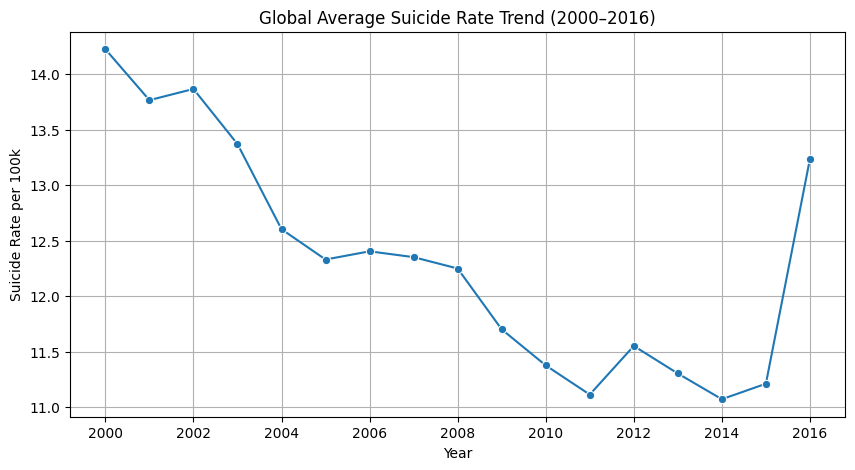

In [ ]:
#Global AVerage Suicide Rate Trend

plt.figure(figsize=(10,5))
df_year = eda.groupby("year")["suicide_rate_per_100k"].mean().reset_index()
sns.lineplot(data=df_year, x="year", y="suicide_rate_per_100k", marker="o")
plt.title("Global Average Suicide Rate Trend (2000–2016)")
plt.xlabel("Year")
plt.ylabel("Suicide Rate per 100k")
plt.grid(True)
plt.show()

In [ ]:
  #Linear Regression Model


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
eda = pd.read_csv("/content/merged_model_suicide_wbi_2000_2016.csv")

#Define features & target
target_col = 'suicide_rate_per_100k'
drop_cols = ['country', 'year', 'suicides_no', 'population', target_col]
feature_cols = [c for c in eda.columns if c not in drop_cols]

#x,y
X = eda[feature_cols]
y = eda[target_col]

#Time based Train/vaild/Test
train_df = eda[eda['year'] <= 2012]
valid_df = eda[(eda['year'] >= 2013) & (eda['year'] <= 2014)]
test_df = eda[eda['year'] >= 2015]

X_train, y_train = train_df[feature_cols], train_df[target_col]
X_valid, y_valid = valid_df[feature_cols], valid_df[target_col]
X_test, y_test = test_df[feature_cols], test_df[target_col]

print("\n Split sizes:")
print("Train:", X_train.shape, " Valid:", X_valid.shape, " Test:", X_test.shape)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

#Evaluation
def evaluate_model(name, y_true, y_pred, results):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"{name:25s} MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")
    return results

#Evaluation on valid and test sets
results = []
results = evaluate_model("Validation", y_valid, y_valid_pred, results)
results = evaluate_model("Test", y_test, y_test_pred, results)





 Split sizes:
Train: (964, 25)  Valid: (137, 25)  Test: (69, 25)
Validation                MAE=3.496  RMSE=4.818  R²=0.556
Test                      MAE=3.588  RMSE=4.466  R²=0.582


/tmp/ipython-input-796978761.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




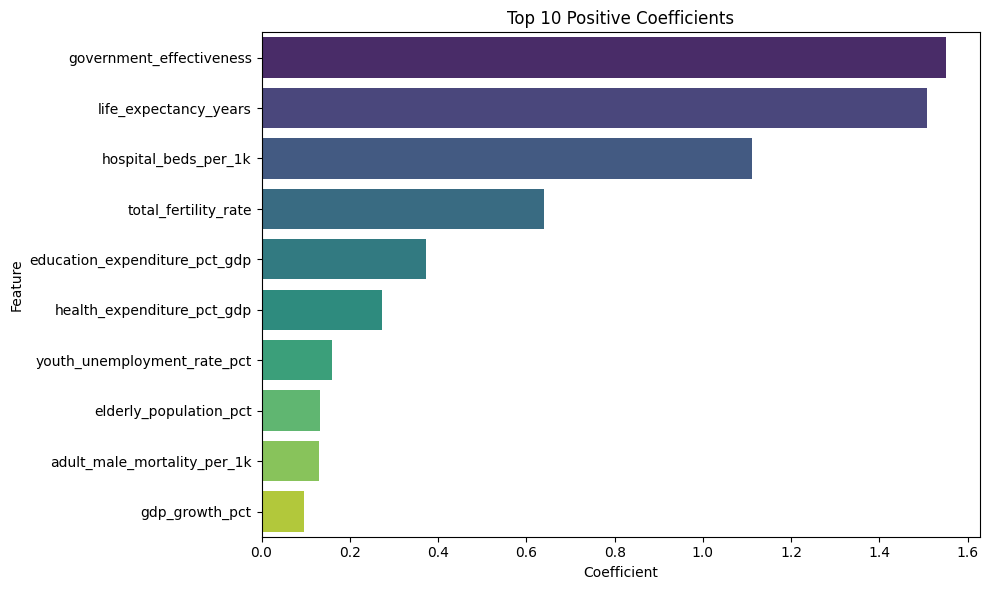

/tmp/ipython-input-796978761.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




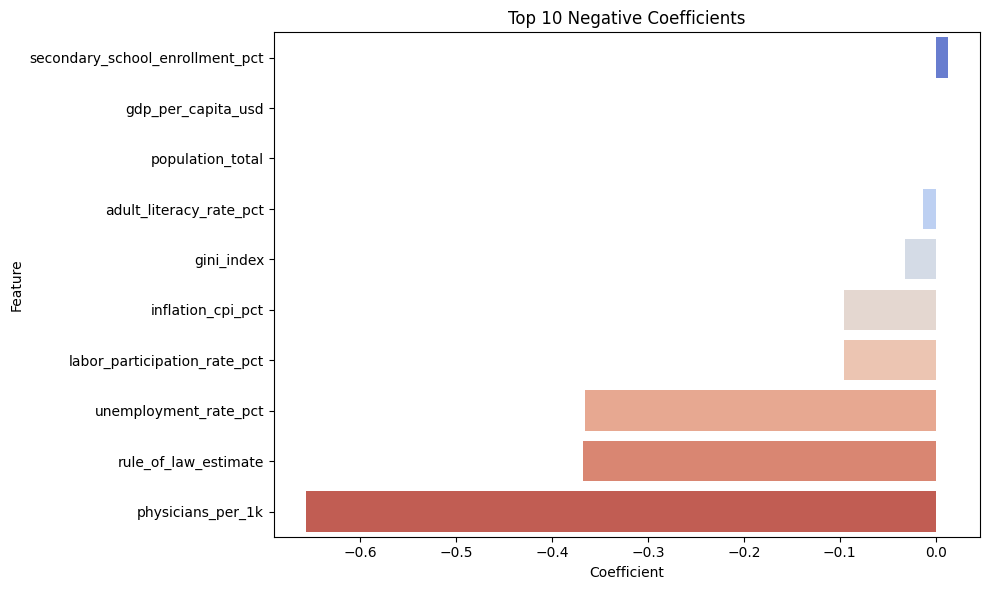

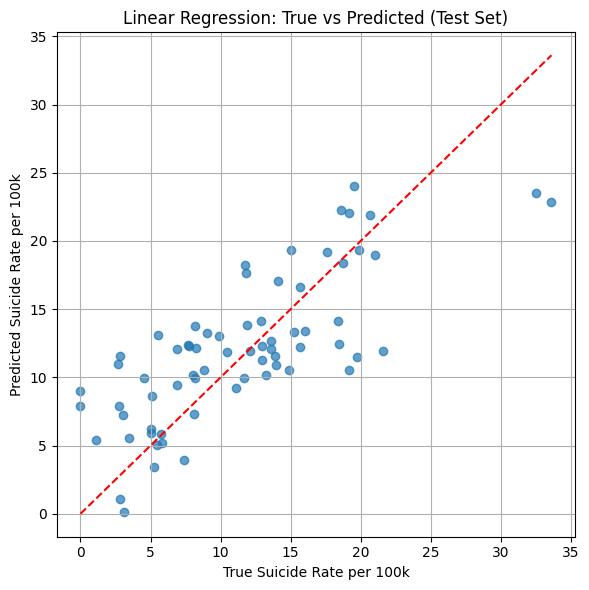

In [ ]:
#Cofficients
coeff_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

#Top 10 Positive and Negative Coefficient
plt.figure(figsize=(10,6))
sns.barplot(data=coeff_df.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.title("Top 10 Positive Coefficients")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=coeff_df.tail(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 Negative Coefficients")
plt.tight_layout()
plt.show()

#True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("True Suicide Rate per 100k")
plt.ylabel("Predicted Suicide Rate per 100k")
plt.title("Linear Regression: True vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()



 Split sizes:
Train: (964, 25)  Valid: (137, 25)  Test: (69, 25)
Validation                MAE=1.715  RMSE=2.761  R²=0.854
Test                      MAE=2.216  RMSE=3.565  R²=0.733


/tmp/ipython-input-2973254381.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2973254381.py:73: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




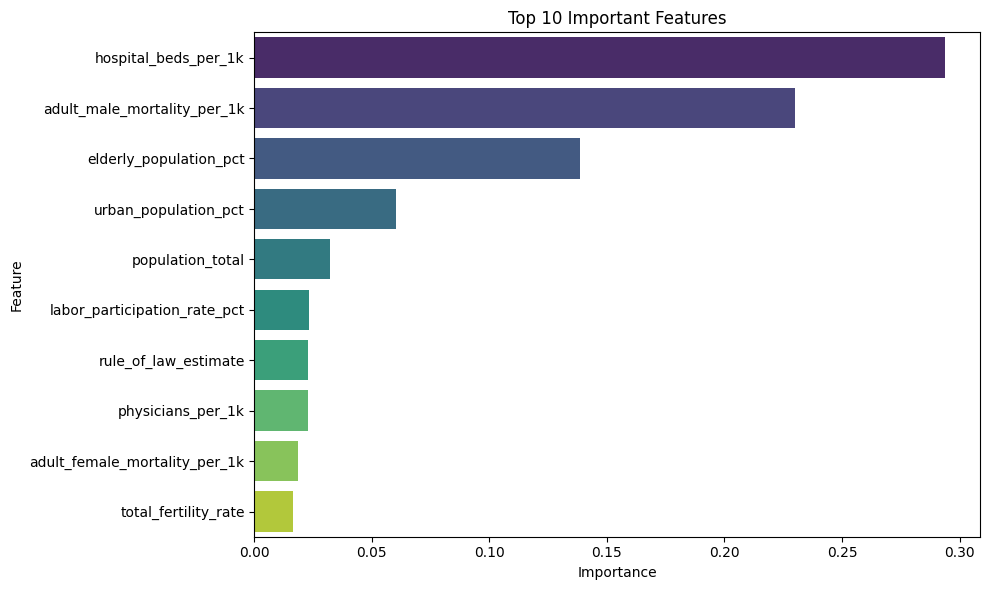

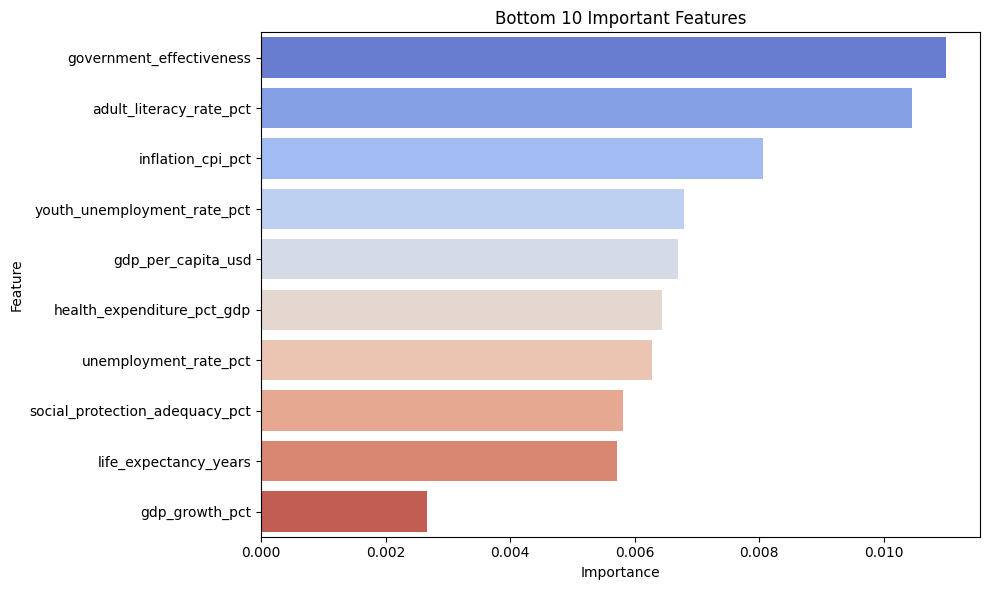

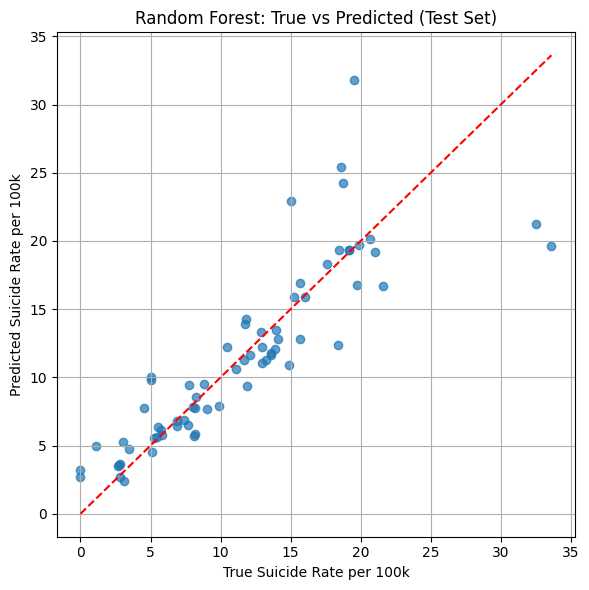

In [ ]:
#Random Forest Regressor

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
eda = pd.read_csv("/content/merged_model_suicide_wbi_2000_2016.csv")

#Define Features & Target
target_col = 'suicide_rate_per_100k'
drop_cols = ['country', 'year', 'suicides_no', 'population', target_col]
feature_cols = [c for c in eda.columns if c not in drop_cols]

X = eda[feature_cols]
y = eda[target_col]

#Time based split
train_df = eda[eda['year'] <= 2012]
valid_df = eda[(eda['year'] >= 2013) & (eda['year'] <= 2014)]
test_df = eda[eda['year'] >= 2015]

x_train, y_train = train_df[feature_cols], train_df[target_col]
x_valid, y_valid = valid_df[feature_cols], valid_df[target_col]
x_test, y_test = test_df[feature_cols], test_df[target_col]

print("\n Split sizes:")
print("Train:", x_train.shape, " Valid:", x_valid.shape, " Test:", x_test.shape)

#Train
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

#Predicitions
y_valid_pred = rf.predict(x_valid)
y_test_pred = rf.predict(x_test)

#Evaluation
def evaluate_model(name, y_true, y_pred, results):
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
  print(f"{name:25s} MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")
  return results

#Evaluation on valid and test sets
results = evaluate_model("Validation", y_valid, y_valid_pred, results)
results = evaluate_model("Test", y_test, y_test_pred, results)

#Feature Important
importances = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

# 10 Top and Bottom important features
plt.figure(figsize=(10,6))
sns.barplot(data=importances.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features")
plt.tight_layout()

plt.figure(figsize=(10,6))
sns.barplot(data=importances.tail(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Bottom 10 Important Features")
plt.tight_layout()

#True vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("True Suicide Rate per 100k")
plt.ylabel("Predicted Suicide Rate per 100k")
plt.title("Random Forest: True vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()


Categorical columns: []
Numeric columns    : ['inflation_cpi_pct', 'government_effectiveness', 'gdp_growth_pct', 'gdp_per_capita_usd', 'rule_of_law_estimate', 'adult_literacy_rate_pct', 'secondary_school_enrollment_pct', 'education_expenditure_pct_gdp', 'hospital_beds_per_1k', 'physicians_per_1k', 'health_expenditure_pct_gdp', 'Poverty_rate_pct', 'gini_index', 'labor_participation_rate_pct', 'youth_unemployment_rate_pct', 'unemployment_rate_pct', 'adult_female_mortality_per_1k', 'adult_male_mortality_per_1k', 'life_expectancy_years', 'total_fertility_rate', 'working_age_population_pct', 'elderly_population_pct', 'population_total', 'urban_population_pct', 'social_protection_adequacy_pct']

 Split sizes:
Train: (964, 25)  Valid: (137, 25)  Test: (69, 25)

===== Validation Performance =====
MAE  : 3.659
RMSE : 5.321
MSE  : 28.310
R²   : 0.458

===== Test Performance =====
MAE  : 3.669
RMSE : 5.196
MSE  : 26.994
R²   : 0.434


/tmp/ipython-input-1085029074.py:112: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




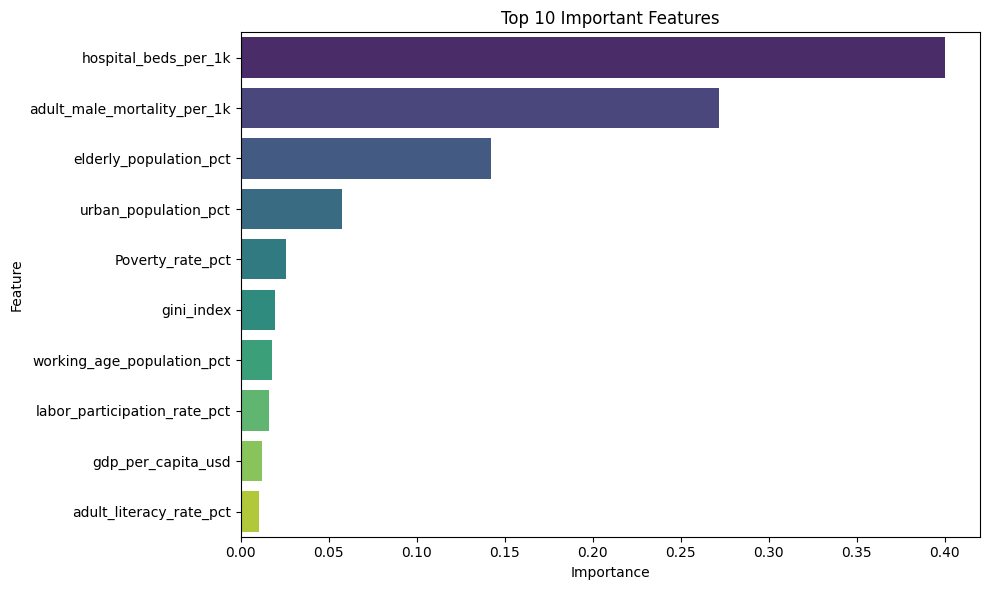

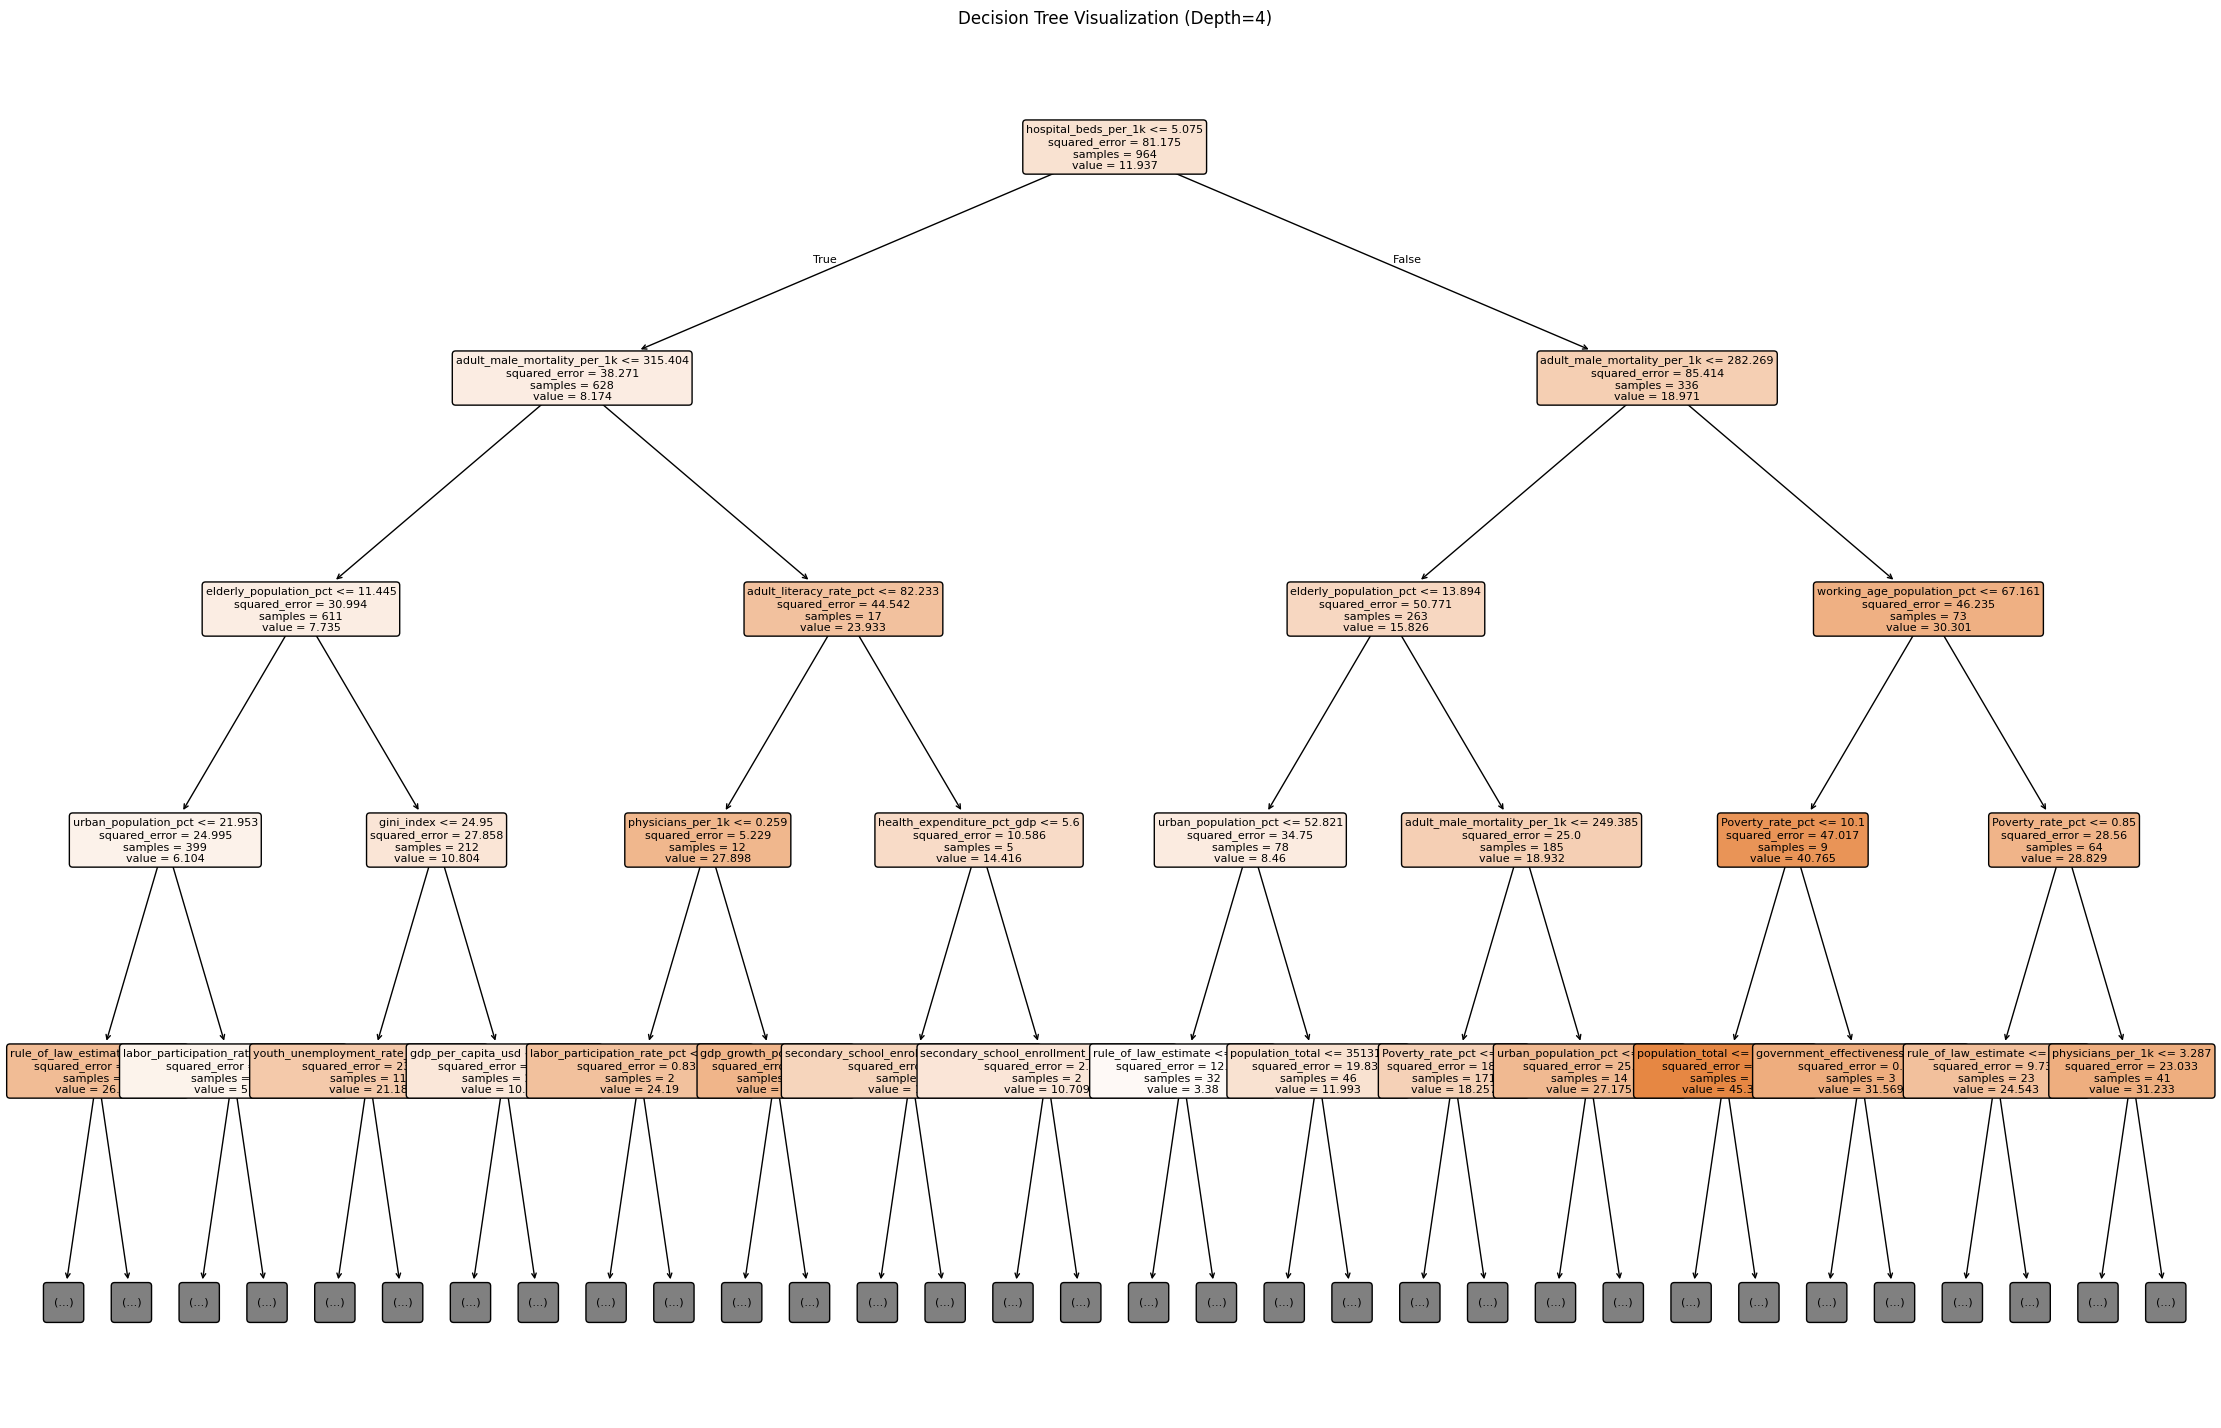

In [ ]:
#Decision Tree Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
eda = pd.read_csv("/content/merged_model_suicide_wbi_2000_2016.csv")

#Select target and feature
target_col = 'suicide_rate_per_100k'
drop_cols = ['country', 'year', 'suicides_no', 'population', target_col]
feature_cols = [c for c in eda.columns if c not in drop_cols]

#X,Y
X = eda[feature_cols]
y = eda[target_col]

#Identify categorical & numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns    :", numeric_cols)

#Time based Train/Validation/Test
train_df = eda[eda['year'] <= 2012]
valid_df = eda[(eda['year'] >= 2013) & (eda['year'] <= 2014)]
test_df = eda[eda['year'] >= 2015]

x_train, y_train = train_df[feature_cols], train_df[target_col]
x_valid, y_valid = valid_df[feature_cols], valid_df[target_col]
x_test, y_test = test_df[feature_cols], test_df[target_col]

print("\n Split sizes:")
print("Train:", x_train.shape, " Valid:", x_valid.shape, " Test:", x_test.shape)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# decision  tree model
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", dt_model)
])

# Fit on TRAIN data
pipeline.fit(x_train, y_train)

# Evaluate on VALIDATION and TEST sets
def evaluate_split(name, x, y_true):
    y_pred = pipeline.predict(x)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n===== {name} Performance =====")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"MSE  : {mse:.3f}")
    print(f"R²   : {r2:.3f}")
    return y_pred

y_valid_pred = evaluate_split("Validation", x_valid, y_valid)
y_test_pred = evaluate_split("Test", x_test, y_test)

#Features Importance
preprocess_fitted = pipeline.named_steps["preprocess"]

#Onehot features names
if categorical_cols:
    ohe = preprocess_fitted.named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)
else:
    cat_feature_names = np.array([])

#Numeric feature names
num_feature_names = np.array(numeric_cols)

#Full feature name list in correct order
all_feature_names = np.concatenate([cat_feature_names, num_feature_names])

dt_fitted = pipeline.named_steps["model"]

importances_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": dt_fitted.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features")
plt.tight_layout()

#Decision Tree visualization
plt.figure(figsize=(28, 18))
plot_tree(
    dt_fitted,
    feature_names=all_feature_names,
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=4
)
plt.title("Decision Tree Visualization (Depth=4)")
plt.show()




 Split sizes:
Train: (964, 25)  Valid: (137, 25)  Test: (69, 25)

 Best CatBoost parameters: {'depth': 8, 'learning_rate': 0.05, 'iterations': 900, 'l2_leaf_reg': 3}
Validation RMSE (best): 2.1127

CatBoost Performance
Validation (2013–2014)  MAE=0.250  RMSE=0.319  R²=0.998
Test (2015–2016)  MAE=1.233  RMSE=1.840  R²=0.929

Summary metrics:
                   Model       MAE      RMSE        R2
0  CatBoost - Validation  0.249833  0.318665  0.998056
1        CatBoost - Test  1.233404  1.839690  0.929005

Top 10 important features (CatBoost):
                         Feature  Importance
17   adult_male_mortality_per_1k   17.537190
8           hospital_beds_per_1k   14.671968
21        elderly_population_pct    9.014219
23          urban_population_pct    7.774156
22              population_total    7.360219
13  labor_participation_rate_pct    5.300491
5        adult_literacy_rate_pct    3.932574
9              physicians_per_1k    3.434538
15         unemployment_rate_pct    3.228595
11

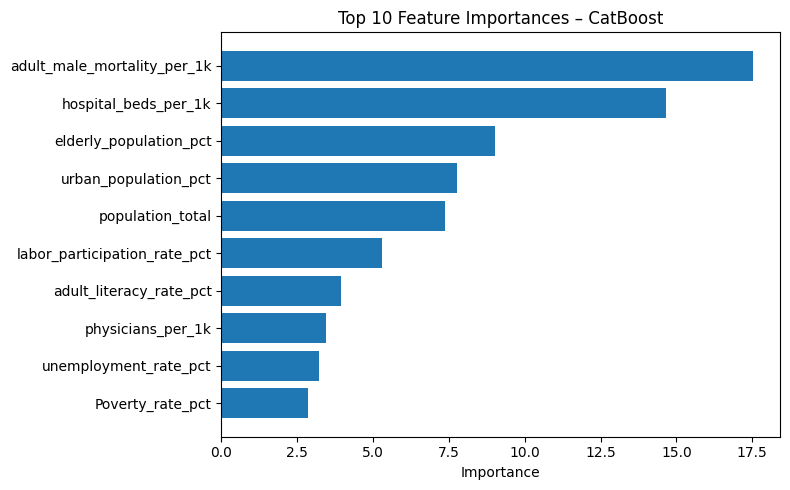

In [55]:
#Catboost Regression with hyperparameter tuning
import pandas as pd
import numpy as np
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Load data
eda = pd.read_csv("/content/merged_model_suicide_wbi_2000_2016.csv")

target_col = 'suicide_rate_per_100k'
drop_cols = ['country', 'year', 'suicides_no', 'population', target_col]
feature_cols = [c for c in eda.columns if c not in drop_cols]

#Time-Based Split
train_df = eda[eda['year'] <= 2012]
valid_df = eda[(eda['year'] >= 2013) & (eda['year'] <= 2014)]
test_df = eda[eda['year'] >= 2015]

x_train, y_train = train_df[feature_cols], train_df[target_col]
x_valid, y_valid = valid_df[feature_cols], valid_df[target_col]
x_test, y_test = test_df[feature_cols], test_df[target_col]

print("\n Split sizes:")
print("Train:", x_train.shape, " Valid:", x_valid.shape, " Test:", x_test.shape)

#Hyperparameter tuning
param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05],
    "iterations": [300, 600, 900],
    "l2_leaf_reg": [1, 3]
}

best_rmse = float("inf")
best_params = None
best_model = None

for depth in param_grid["depth"]:
    for lr in param_grid["learning_rate"]:
        for iters in param_grid["iterations"]:
            for l2 in param_grid["l2_leaf_reg"]:
                model_tmp = CatBoostRegressor(
                    depth=depth,
                    learning_rate=lr,
                    iterations=iters,
                    l2_leaf_reg=l2,
                    loss_function="RMSE",
                    random_seed=42,
                    verbose=False
                )

                # Train on TRAIN, evaluate on VALID
                model_tmp.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=False)
                y_valid_pred = model_tmp.predict(x_valid)
                rmse_val = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
                if rmse_val < best_rmse:
                     best_rmse = rmse_val
                     best_params = {
                        "depth": depth,
                        "learning_rate": lr,
                        "iterations": iters,
                        "l2_leaf_reg": l2
                    }
                     best_model = model_tmp

print("\n Best CatBoost parameters:", best_params)
print("Validation RMSE (best):", round(best_rmse, 4))

#retrain best model on train
X_train_full = pd.concat([x_train, x_valid], axis=0)
y_train_full = pd.concat([y_train, y_valid], axis=0)

cat_final = CatBoostRegressor(
    **best_params,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)

cat_final.fit(X_train_full, y_train_full)

#Predications
y_valid_full_pred = cat_final.predict(x_valid)
y_test_pred = cat_final.predict(x_test)

#Metrics
def eval_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}  MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")
    return mae, rmse, r2


print("\nCatBoost Performance")
val_mae, val_rmse, val_r2 = eval_metrics("Validation (2013–2014)", y_valid, y_valid_full_pred)
test_mae, test_rmse, test_r2 = eval_metrics("Test (2015–2016)", y_test, y_test_pred)

#Summary table
summary = pd.DataFrame({
    "Model": ["CatBoost - Validation", "CatBoost - Test"],
    "MAE": [val_mae, test_mae],
    "RMSE": [val_rmse, test_rmse],
    "R2": [val_r2, test_r2]
})
print("\nSummary metrics:")
print(summary)

#Feature Importance
importances = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": cat_final.get_feature_importance()
}).sort_values("Importance", ascending=False)

print("\nTop 10 important features (CatBoost):")
print(importances.head(10))

#bar plot of top 10 features
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(importances.head(10)["Feature"][::-1],
             importances.head(10)["Importance"][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances – CatBoost")
plt.tight_layout()
plt.show()

Train: (964, 26)
Valid: (137, 26)
Test : (69, 26)

XGBoost – Validation
MAE  = 1.742
RMSE = 2.480
R²   = 0.882

XGBoost – Test
MAE  = 2.204
RMSE = 3.044
R²   = 0.806


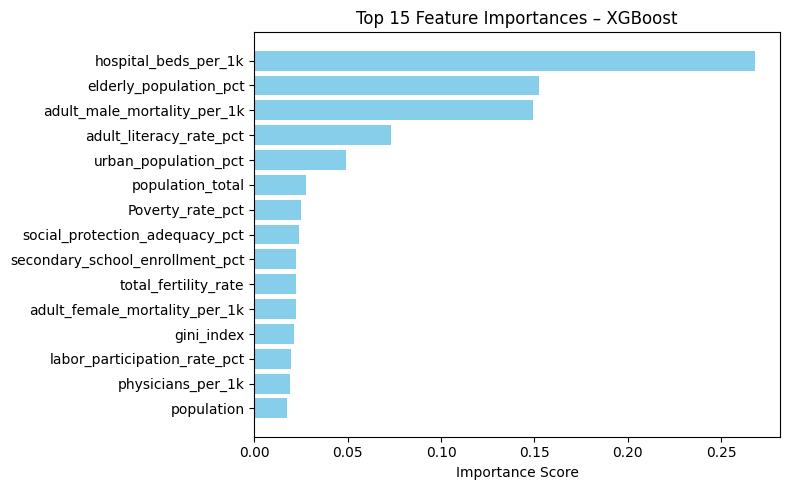

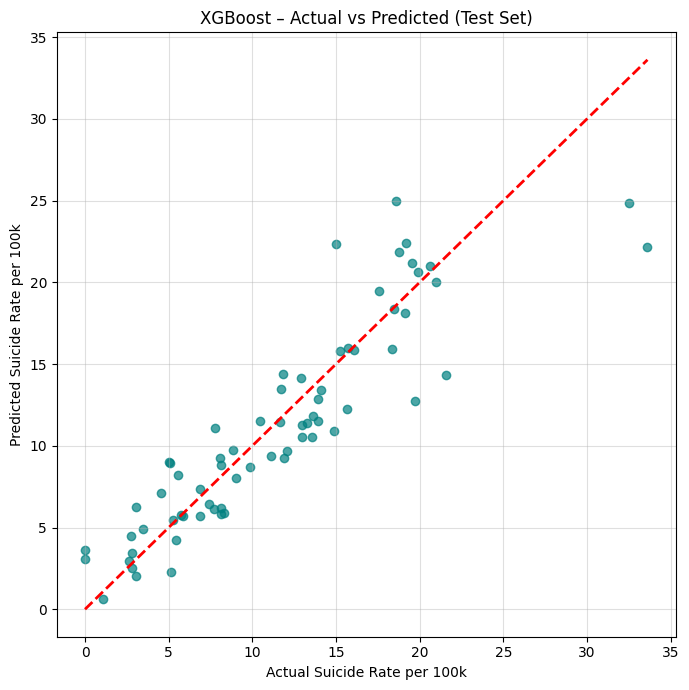

In [ ]:
#XGBOOST Regression

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load the dataset
eda = pd.read_csv("merged_model_suicide_wbi_2000_2016.csv")

#select target and feature
target = "suicide_rate_per_100k"
drop_cols = ["country", "year", "suicides_no"]
features = [col for col in eda.columns if col not in drop_cols + [target]]

#Train/valid/Test
train_df = eda[eda["year"] <= 2012]
valid_df = eda[(eda["year"] == 2013) | (eda["year"] == 2014)]
test_df  = eda[eda["year"] >= 2015]

X_train = train_df[features]
y_train = train_df[target]

X_valid = valid_df[features]
y_valid = valid_df[target]

X_test  = test_df[features]
y_test  = test_df[target]

print("Train:", X_train.shape)
print("Valid:", X_valid.shape)
print("Test :", X_test.shape)

#XGBoost Model
xgb = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

#Predict
y_valid_pred = xgb.predict(X_valid)
y_test_pred  = xgb.predict(X_test)

#Evaluation
def evaluate(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}")
    print(f"MAE  = {mae:.3f}")
    print(f"RMSE = {rmse:.3f}")
    print(f"R²   = {r2:.3f}")
    return mae, rmse, r2



evaluate("XGBoost – Validation", y_valid, y_valid_pred)
evaluate("XGBoost – Test", y_test, y_test_pred)

#Feature Importance
importances = xgb.feature_importances_
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)
plt.figure(figsize=(8,5))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – XGBoost")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_test_pred, alpha=0.7, color="teal")
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel("Actual Suicide Rate per 100k")
plt.ylabel("Predicted Suicide Rate per 100k")
plt.title("XGBoost – Actual vs Predicted (Test Set)")
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()



Split sizes:
Train: (964, 26)
Valid: (137, 26)
Test: (69, 26)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6283
[LightGBM] [Info] Number of data points in the train set: 964, number of used features: 26
[LightGBM] [Info] Start training from score 11.936986
Validation                MAE=1.664  RMSE=2.444  R²=0.886
Test                      MAE=2.097  RMSE=3.059  R²=0.804

Top 10 Important Features:
                          Feature  Importance
3                  gdp_growth_pct        1192
0                      population        1081
24           urban_population_pct         932
18    adult_male_mortality_per_1k         929
16          unemployment_rate_pct         859
4              gdp_per_capita_usd         841
14   labor_participation_rate_pct         797
19          life_expectancy_years         759
8   education_expenditure_pct_gdp     

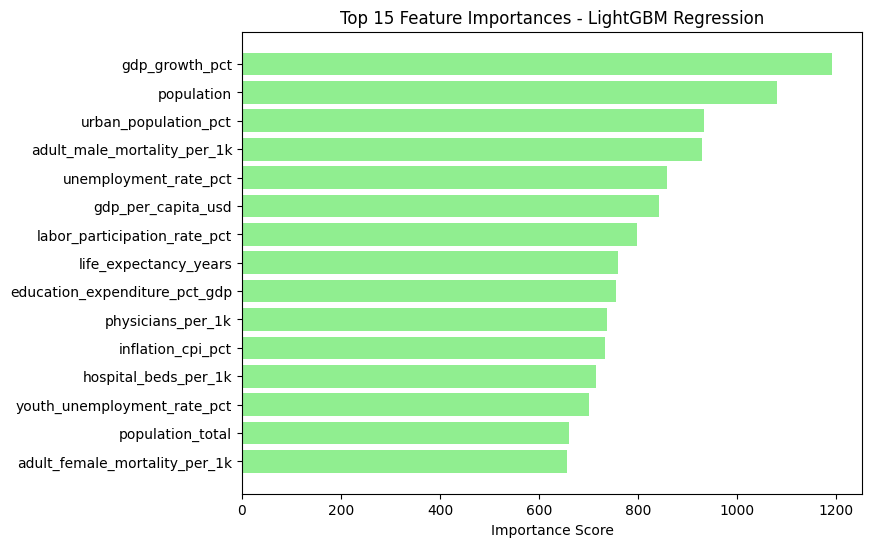

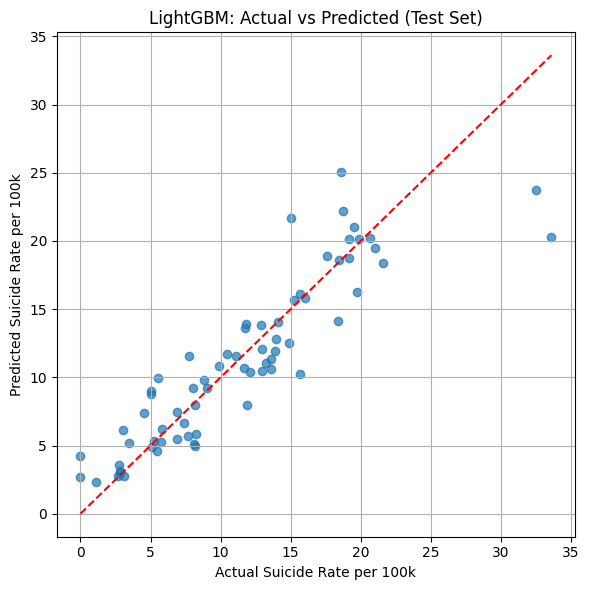

In [ ]:
 #Lightgbm Regression

import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#Load the dataset
eda = pd.read_csv("merged_model_suicide_wbi_2000_2016.csv")

#Select Target & Features
target = "suicide_rate_per_100k"
drop_cols = ["country", "year", "suicides_no"]
features = [col for col in eda.columns if col not in drop_cols + [target]]

X = eda[features]
y = eda[target]

#Time Based Split
train_df = eda[eda["year"] <= 2012]
valid_df = eda[(eda["year"] >= 2013) & (eda["year"] <= 2014)]
test_df  = eda[eda["year"] >= 2015]

X_train, y_train = train_df[features], train_df[target]
X_valid, y_valid = valid_df[features], valid_df[target]
X_test,  y_test  = test_df[features],  test_df[target]

print(f"\nSplit sizes:\nTrain: {X_train.shape}\nValid: {X_valid.shape}\nTest: {X_test.shape}")

#Train
lgbm_model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="rmse"
)

#Predictions
y_valid_pred = lgbm_model.predict(X_valid)
y_test_pred  = lgbm_model.predict(X_test)

#Evaluations
def evaluate_model(name, y_true, y_pred, results):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    print(f"{name:25s} MAE={mae:.3f}  RMSE={rmse:.3f}  R²={r2:.3f}")
    return results

    results = []
results = evaluate_model("Validation", y_valid, y_valid_pred, results)
results = evaluate_model("Test", y_test, y_test_pred, results)

#Feature important
importances = pd.DataFrame({
    "Feature": features,
    "Importance": lgbm_model.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nTop 10 Important Features:")
print(importances.head(10))

#Plot feature important
plt.figure(figsize=(8,6))
plt.barh(importances.head(15)["Feature"], importances.head(15)["Importance"], color="lightgreen")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - LightGBM Regression")
plt.xlabel("Importance Score")
plt.show()

#True vs Predictes
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.xlabel("Actual Suicide Rate per 100k")
plt.ylabel("Predicted Suicide Rate per 100k")
plt.title("LightGBM: Actual vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()








 Split sizes
Train: (964, 26)  Valid: (137, 26)  Test: (69, 26)

 Scaled features
Train: (964, 26)  Valid: (137, 26)  Test: (69, 26)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 201.8834 - mae: 11.0073 - val_loss: 73.9705 - val_mae: 6.3426
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.7180 - mae: 6.7275 - val_loss: 42.8693 - val_mae: 4.8705
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.3002 - mae: 5.2634 - val_loss: 30.4363 - val_mae: 3.9007
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.9135 - mae: 4.5795 - val_loss: 26.9819 - val_mae: 3.8328
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.7571 - mae: 4.4738 - val_loss: 25.0808 - val_mae: 3.4931
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.4489 - mae: 4.3036 - val_loss: 22.7812 - val_mae: 3.4629
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.7602 - mae: 4.1100 - val_loss: 21.5506 - val_mae: 3.3615
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.8137 - mae: 4.0174 - val_loss: 20.1465 - val_mae: 3.1679
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

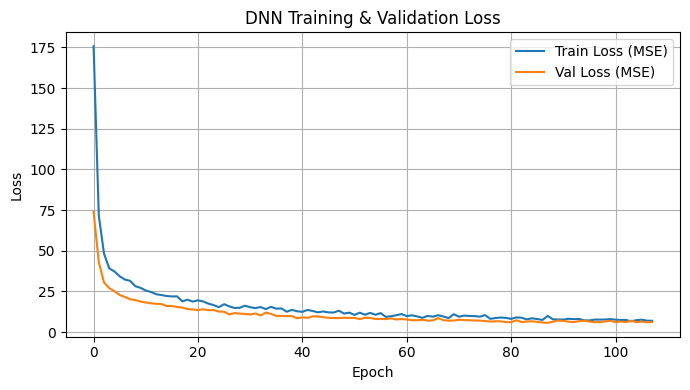

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

 DNN Test Performance:
  RMSE: 2.211
  MAE : 1.636
  R²  : 0.897


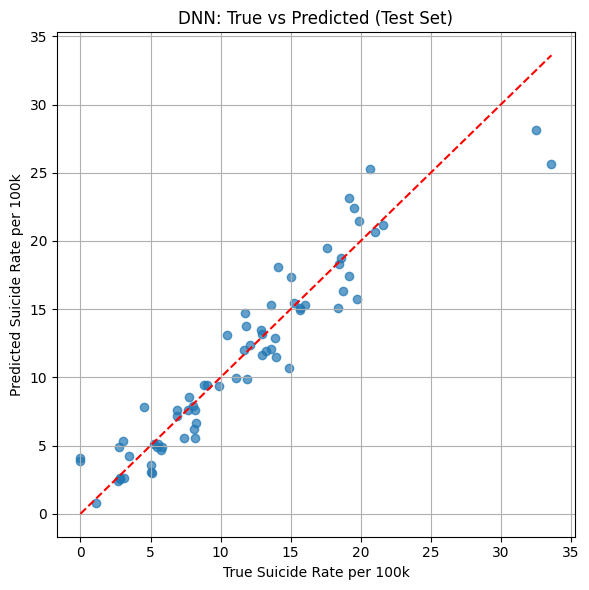

In [ ]:
#Deep Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#load the dataset
eda = pd.read_csv("merged_model_suicide_wbi_2000_2016.csv")
eda = eda.sort_values(["country", "year"]).reset_index(drop=True)

#Features and Target
target_col = "suicide_rate_per_100k"
drop_cols = ["country", "year", "suicides_no"]
feature_cols = [c for c in eda.columns if c not in drop_cols + [target_col]]

X_all = eda[feature_cols].values
y_all = eda[target_col].values

#Time  Based  Split
train_mask = eda["year"] <= 2012
valid_mask = (eda["year"] >= 2013) & (eda["year"] <= 2014)
test_mask  = eda["year"] >= 2015

x_train_raw, y_train = X_all[train_mask], y_all[train_mask]
x_valid_raw, y_valid = X_all[valid_mask], y_all[valid_mask]
x_test_raw,  y_test  = X_all[test_mask],  y_all[test_mask]

print("\n Split sizes")
print("Train:", x_train_raw.shape, " Valid:", x_valid_raw.shape, " Test:", x_test_raw.shape)

#Scale Features
scaler = StandardScaler()
scaler.fit(x_train_raw)

x_train = scaler.transform(x_train_raw)
x_valid = scaler.transform(x_valid_raw)
x_test  = scaler.transform(x_test_raw)

print("\n Scaled features")
print("Train:", x_train.shape, " Valid:", x_valid.shape, " Test:", x_test.shape)

#Build DNN Features
model = Sequential([
    Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1)   # regression output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]
)

model.summary()

#Train with Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

#Plot loss curve
plt.figure(figsize=(7,4))
plt.plot(history.history["loss"], label="Train Loss (MSE)")
plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DNN Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Evaluate on Test
y_pred_test = model.predict(x_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae  = mean_absolute_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)

print("\n DNN Test Performance:")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE : {mae:.3f}")
print(f"  R²  : {r2:.3f}")

#True vs Predict
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.xlabel("True Suicide Rate per 100k")
plt.ylabel("Predicted Suicide Rate per 100k")
plt.title("DNN: True vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()



Year range: 2000 to 2016
   year  suicide_rate_per_100k
0  2000              13.068658
1  2001              12.859429
2  2002              13.030930
3  2003              12.595630
4  2004              11.890769
Supervised shapes: (12, 5) (12,)
Train target years: [2005 2006 2007 2008 2009 2010 2011 2012]
Valid target years : [2013 2014]
Test target years  : [2015 2016]
TimeSeriesTransformer(
  (input_projection): Linear(in_features=1, out_features=32, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (nor

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



Epoch  50 | Train MSE: 0.0371 | Valid MSE: 0.0690
Epoch 100 | Train MSE: 0.0601 | Valid MSE: 0.0403
Epoch 150 | Train MSE: 0.0218 | Valid MSE: 0.0233
Epoch 200 | Train MSE: 0.0258 | Valid MSE: 0.0159
Epoch 250 | Train MSE: 0.0263 | Valid MSE: 0.0192
Epoch 300 | Train MSE: 0.0275 | Valid MSE: 0.0152
TimeSeriesTransformer(
  (input_projection): Linear(in_features=1, out_features=32, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=64, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=64, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropo

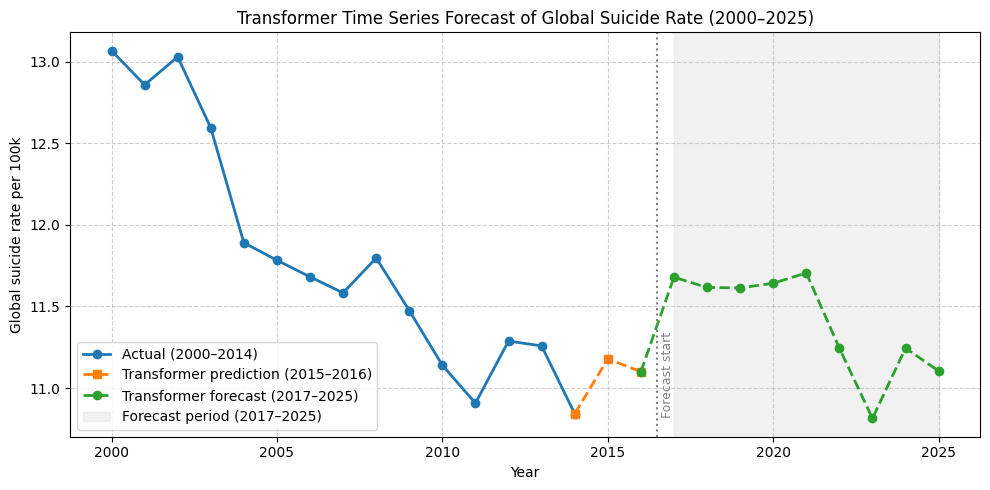


Transformer forecast 2017-2025:
   year  transformer_forecast_suicide_rate_per_100k
0  2017                                   11.679619
1  2018                                   11.616637
2  2019                                   11.614189
3  2020                                   11.642053
4  2021                                   11.706070
5  2022                                   11.244232
6  2023                                   10.813928
7  2024                                   11.244907
8  2025                                   11.103950


In [ ]:
#Transformer Time Series Forecast

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error

#load and aggregate yearly global series
eda = pd.read_csv("merged_model_suicide_wbi_2000_2016.csv")

target = "suicide_rate_per_100k"
eda_year = (
    eda.groupby("year")[target]
    .mean()
    .reset_index()
    .sort_values("year")
)

years = eda_year["year"].values.astype(int)
series = eda_year[target].values.astype("float32")

print("Year range:", years.min(), "to", years.max())
print(eda_year.head())

#Normalize series
mean_y = series.mean()
std_y  = series.std()
series_norm = (series - mean_y) / std_y

#Build supervised sequences
def make_sequences(series_norm, years, input_window=5):
    """
    X[i] = last `input_window` normalised values
    y[i] = next value
     """
    X, y, y_years = [], [], []
    for t in range(input_window, len(series_norm)):
        X.append(series_norm[t-input_window:t])
        y.append(series_norm[t])
        y_years.append(years[t])
    X = np.stack(X).astype("float32")
    y = np.array(y, dtype="float32")
    y_years = np.array(y_years, dtype="int32")
    return X, y, y_years

INPUT_WINDOW = 5
X_all, y_all, y_years = make_sequences(series_norm, years, INPUT_WINDOW)
print("Supervised shapes:", X_all.shape, y_all.shape)

#Time based split
train_mask = y_years <= 2012
valid_mask = (y_years > 2012) & (y_years <= 2014)
test_mask  = y_years > 2014

X_train, y_train = X_all[train_mask], y_all[train_mask]
X_valid, y_valid = X_all[valid_mask], y_all[valid_mask]
X_test,  y_test  = X_all[test_mask],  y_all[test_mask]
years_train = y_years[train_mask]
years_valid = y_years[valid_mask]
years_test  = y_years[test_mask]

print("Train target years:", years_train)
print("Valid target years :", years_valid)
print("Test target years  :", years_test)

#reshape for Transformer : (seq_len, batch, feature_dim)
def to_transformer_tensor(X, y):
    #X: (N, seq_len)-> (seq_len, N, 1)
    X_t = torch.from_numpy(X).unsqueeze(-1).permute(1, 0, 2)
    y_t = torch.from_numpy(y)
    return X_t, y_t

X_train_t, y_train_t = to_transformer_tensor(X_train, y_train)
X_valid_t, y_valid_t = to_transformer_tensor(X_valid, y_valid)
X_test_t,  y_test_t  = to_transformer_tensor(X_test,  y_test)

#Datasets / loaders use (N, seq_len, 1)
train_dataset = TensorDataset(X_train_t.permute(1,0,2), y_train_t)
valid_dataset = TensorDataset(X_valid_t.permute(1,0,2), y_valid_t)

BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

#Positional encodiing
class PositionalEncoding(nn.Module):
  def __init__(self, d_model, max_len=500):
    super().__init__()
    pe = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                         (-np.log(10000.0) / d_model))
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    self.pe = pe.unsqueeze(1)  # (max_len, 1, d_model)

  def forward(self, x):
    # x: (seq_len, batch, d_model)
    seq_len = x.size(0)
    return x + self.pe[:seq_len].to(x.device)

#Transformer model
class TimeSeriesTransformer(nn.Module):
  def __init__(self, input_size=1, d_model=32, nhead=4,
               num_layers=2, dim_feedforward=64, dropout=0.1):
    super().__init__()
    self.d_model = d_model
    self.input_projection = nn.Linear(input_size, d_model)

    encoder_layer = nn.TransformerEncoderLayer(
        d_model=d_model,
        nhead=nhead,
        dim_feedforward=dim_feedforward,
        dropout=dropout,
        batch_first=False  # we use (seq, batch, feat)
    )
    self.transformer_encoder = nn.TransformerEncoder(
        encoder_layer, num_layers=num_layers
    )
    self.pos_encoder = PositionalEncoding(d_model)
    self.fc_out = nn.Linear(d_model, 1)

  def forward(self, src):
    # src: (seq_len, batch, 1)
    src = self.input_projection(src) * np.sqrt(self.d_model)
    src = self.pos_encoder(src)
    enc_output = self.transformer_encoder(src)  # (seq_len, batch, d_model)
    last_step = enc_output[-1]                  # (batch, d_model)
    out = self.fc_out(last_step)                # (batch, 1)
    return out.squeeze(-1)                      # (batch,)

# Assume device is defined, for example:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TimeSeriesTransformer().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print(model)

#Training loop
EPOCHS = 300
best_valid_loss = np.inf
best_state = None

for epoch in range(1, EPOCHS + 1):
    #Train
    model.train()
    train_losses = []
    for batch_x, batch_y in train_loader:
        #batch_x: (batch, seq_len, 1) -> (seq_len, batch, 1)
        batch_x = batch_x.permute(1, 0, 2).to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    #Validate
    model.eval()
    valid_losses = []
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            batch_x = batch_x.permute(1, 0, 2).to(device)
            batch_y = batch_y.to(device)
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_losses.append(loss.item())

    train_loss = np.mean(train_losses)
    valid_loss = np.mean(valid_losses)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_state = model.state_dict()

    if epoch % 50 == 0 or epoch == 1:
        print(f"Epoch {epoch:3d} | Train MSE: {train_loss:.4f} | "
              f"Valid MSE: {valid_loss:.4f}")

#Load best model
if best_state is not None:
    model.load_state_dict(best_state)
    print(model)

#Evaluation on test years(2015-2016)
    model.eval()
    with torch.no_grad():
        X_test_seq = X_test_t.to(device)  # (seq_len, N, 1)
        preds_test_norm = model(X_test_seq).cpu().numpy()

#De-normalise
    y_test_denorm = y_test * std_y + mean_y
    y_pred_test_denorm = preds_test_norm * std_y + mean_y

    mae = mean_absolute_error(y_test_denorm, y_pred_test_denorm)
    rmse = np.sqrt(mean_squared_error(y_test_denorm, y_pred_test_denorm))
    print("\nTransformer Test performance (2015–2016):")
    print("MAE :", round(mae, 3))
    print("RMSE:", round(rmse, 3))
    print("Test years:", years_test)
    print("Actual   :", y_test_denorm)
    print("Predicted:", y_pred_test_denorm)

  #Forecast 2017-2025 iteratively
    last_year = years.max()                         # 2016
    future_years = np.arange(last_year + 1, 2026)   # 2017..2025
    future_preds = []

# start with last INPUT_WINDOW actual values (normalised)
window_vals = series_norm[-INPUT_WINDOW:].copy()  # shape (window,)
future_preds = []

for _ in future_years:
    seq = torch.from_numpy(window_vals).view(INPUT_WINDOW, 1, 1).to(device)
    with torch.no_grad():
        pred_norm = model(seq).item()

    # roll window and append prediction
    window_vals = np.roll(window_vals, -1)
    window_vals[-1] = pred_norm

    future_preds.append(pred_norm)

future_preds = np.array(future_preds)
future_preds_denorm = future_preds * std_y + mean_y
plt.figure(figsize=(10, 5))

# a) Actual 2000–2014 (blue)
mask_train_full = years <= 2014
plt.plot(
    years[mask_train_full],
    series[mask_train_full],
    marker="o",
    color="tab:blue",
    linewidth=2,
    label="Actual (2000–2014)"
)

# b) Transformer prediction 2015–2016 (orange), joined from 2014
last_train_year  = years[mask_train_full][-1]
last_train_value = series[mask_train_full][-1]

pred_x = np.concatenate([[last_train_year], years_test])
pred_y = np.concatenate([[last_train_value], y_pred_test_denorm])

plt.plot(
    pred_x,
    pred_y,
    "s--",
    color="tab:orange",
    linewidth=2,
    label="Transformer prediction (2015–2016)"
)

# c) Transformer forecast 2017–2025 (green), joined from 2016
last_pred_year   = years_test[-1]
last_pred_value  = y_pred_test_denorm[-1]

fc_x = np.concatenate([[last_pred_year], future_years])
fc_y = np.concatenate([[last_pred_value], future_preds_denorm])

plt.plot(
    fc_x,
    fc_y,
    "o--",
    color="tab:green",
    linewidth=2,
    label="Transformer forecast (2017–2025)"
)

# Shaded forecast region & vertical line
plt.axvspan(2017, 2025, color="lightgrey", alpha=0.3,
            label="Forecast period (2017–2025)")
plt.axvline(2016.5, color="gray", linestyle=":", linewidth=1.5)
plt.text(2016.6, min(fc_y), "Forecast start", rotation=90,
         color="gray", va="bottom", fontsize=9)

plt.xlabel("Year")
plt.ylabel("Global suicide rate per 100k")
plt.title("Transformer Time Series Forecast of Global Suicide Rate (2000–2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#Forecast table
forecast_table_transformer = pd.DataFrame({
        "year": future_years,
        "transformer_forecast_suicide_rate_per_100k": future_preds_denorm
    })
print("\nTransformer forecast 2017-2025:")
print(forecast_table_transformer)


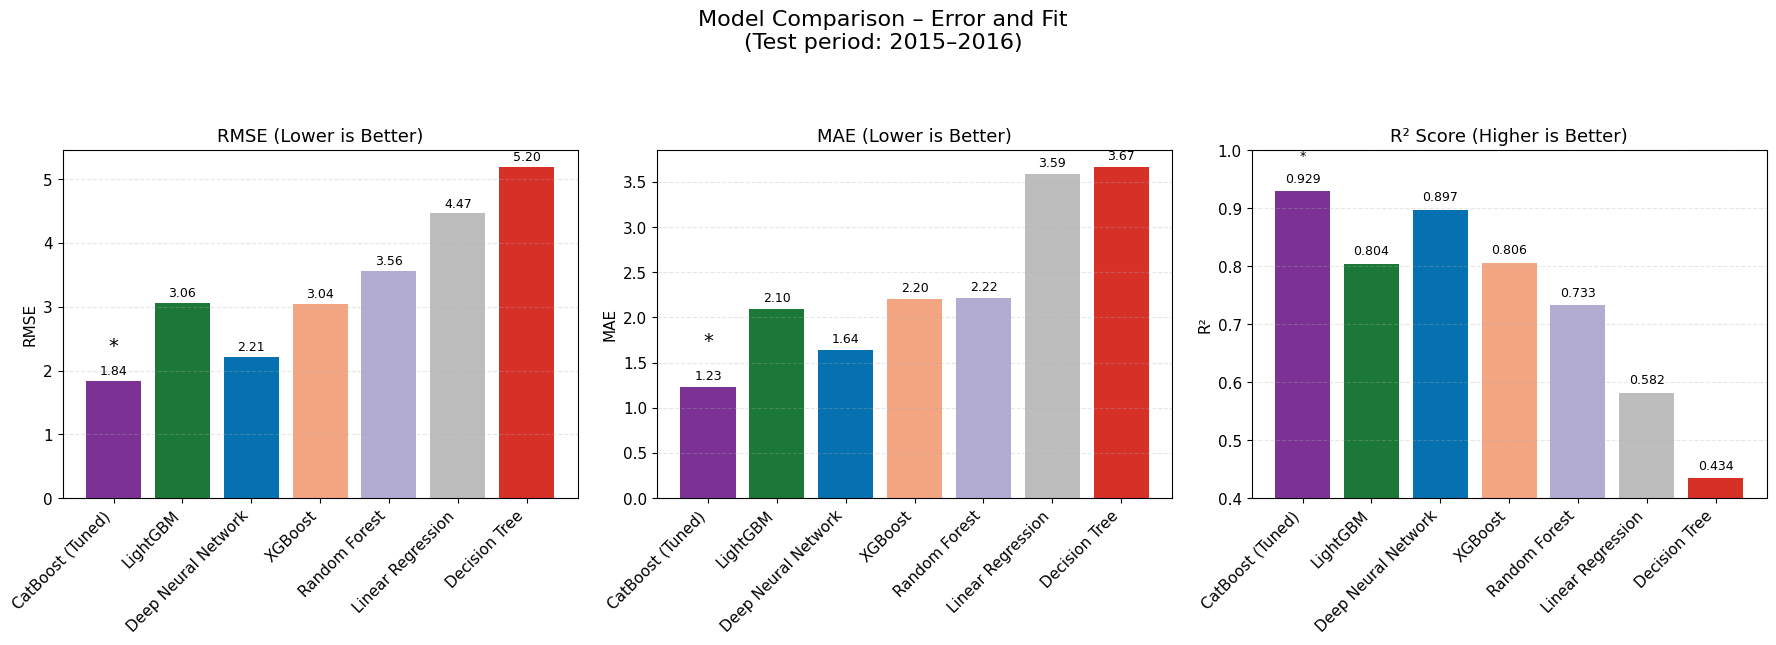

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Desired model order
model_order = [
    "CatBoost (Tuned)",
    "LightGBM",
    "Deep Neural Network",
    "XGBoost",
    "Random Forest",
    "Linear Regression",
    "Decision Tree"
]
#Consistent colours per model
model_colors = {
     "CatBoost (Tuned)"    : "#7b3294",  # purple
     "LightGBM"            : "#1b7837",  # green
     "Deep Neural Network" : "#0571b0",  # blue
     "XGBoost"             : "#f4a582",  # orange
     "Random Forest"       : "#b2abd2",  # light purple
     "Linear Regression"   : "#bdbdbd",  # grey
     "Decision Tree"       : "#d73027",  # red
}

plt.rcParams.update({"font.size": 11})

#1.prep data
results_df = [
    {"Model": "Linear Regression", "MAE": 3.588, "RMSE": 4.466, "R2": 0.582},
    {"Model": "Random Forest", "MAE": 2.216, "RMSE": 3.565, "R2": 0.733},
    {"Model": "Decision Tree", "MAE": 3.669, "RMSE": 5.196, "R2": 0.434},
    {"Model": "CatBoost (Tuned)", "MAE": 1.233, "RMSE": 1.840, "R2": 0.929},
    {"Model": "XGBoost", "MAE": 2.204, "RMSE": 3.044, "R2": 0.806},
    {"Model": "LightGBM", "MAE": 2.097, "RMSE": 3.059, "R2": 0.804},
    {"Model": "Deep Neural Network", "MAE": 1.636, "RMSE": 2.211, "R2": 0.897}

]

results_df = pd.DataFrame(results_df)

df =  results_df.copy()

#keep only models that exist in result_df
model_order_used = [m for m in model_order if m in df["Model"].values]
df = df.set_index("Model").loc[model_order_used].reset_index()

#auto-detect R² column
possible_r2 = ["R2"]
r2_col = next((c for c in possible_r2 if c in df.columns), None)
if r2_col is None:
    raise ValueError("No R² column found in results_df!")

models = df["Model"].values
rmse_vals = df["RMSE"].values
mae_vals  = df["MAE"].values
r2_vals   = df[r2_col].values

x = np.arange(len(models))
colors = [model_colors[m] for m in models]

#Indices of best models
best_rmse_idx = np.argmin(rmse_vals)   # smallest RMSE
best_mae_idx  = np.argmin(mae_vals)    # smallest MAE
best_r2_idx   = np.argmax(r2_vals)     # largest R²

#Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle("Model Comparison – Error and Fit\n(Test period: 2015–2016)",
             fontsize=16, y=1.07)
#RMSE
bars1 = axes[0].bar(x, rmse_vals, color=colors)
for i, (bar, v) in enumerate(zip(bars1, rmse_vals)):
    axes[0].text(i, v + 0.05, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
    if i == best_rmse_idx:
        axes[0].text(i, v + 0.4,"*",ha="center", va="bottom", fontsize=14)
        axes[0].set_title("RMSE (Lower is Better)", fontsize=13)
        axes[0].set_ylabel("RMSE")
        axes[0].set_xticks(x)
        axes[0].set_xticklabels(models, rotation=45, ha="right")
        axes[0].grid(axis="y", linestyle="--", alpha=0.3)

#MAE
bars2 = axes[1].bar(x, mae_vals, color=colors)
for i, (bar, v) in enumerate(zip(bars2, mae_vals)):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
    if i == best_mae_idx:
        axes[1].text(i, v + 0.4,"*",ha="center", va="bottom", fontsize=14)
        axes[1].set_title("MAE (Lower is Better)", fontsize=13)
        axes[1].set_ylabel("MAE")
        axes[1].set_xticks(x)
        axes[1].set_xticklabels(models, rotation=45, ha="right")
        axes[1].grid(axis="y", linestyle="--", alpha=0.3)

#R2
bars3 = axes[2].bar(x, r2_vals, color=colors)
for i, (bar, v) in enumerate(zip(bars3, r2_vals)):
    axes[2].text(i, v + 0.01, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
axes[2].text(best_r2_idx,r2_vals[best_r2_idx] + 0.05,"*",ha="center", va="bottom", fontsize=9)
axes[2].set_title("R² Score (Higher is Better)", fontsize=13)
axes[2].set_ylabel("R²")
axes[2].set_ylim(0.4, 1.0)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=45, ha="right")
axes[2].grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()
